In [1]:
import warnings;
warnings.filterwarnings('ignore');

In [2]:
pip install PyPortfolioOpt

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.cla import CLA 
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.expected_returns import mean_historical_return
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import plotting
from docx import Document
from docx.shared import Inches

In [3]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sn
from tabulate import tabulate
import datetime
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from scipy.optimize import minimize
import matplotlib.patches as mpatches
import matplotlib as mpl

## Importing the Data for ETfs

In [4]:
df=pd.read_csv("C://Users//Pratiksha Sharma//Desktop//NewKibotData//MasterFile9July.csv")
df=df.rename(columns = {'Unnamed: 0':'stock_name'})
df=df.drop('Unnamed: 1',axis=1)
df.Date=pd.to_datetime(df.Date)
df.Close[(df.stock_name=='XLI') & (df.Date==pd.to_datetime('2000-04-05'))]=19.8
df.Close[(df.stock_name=='XLI') & (df.Date==pd.to_datetime('2002-01-31'))]=18.11
df.Close[(df.stock_name=='XLY') & (df.Date==pd.to_datetime('2000-08-29'))]=19.19
df.Open[(df.stock_name=='XLI') & (df.Date==pd.to_datetime('2000-04-05'))]=29.16
df.Open[(df.stock_name=='XLI') & (df.Date==pd.to_datetime('2002-01-31'))]=25.58
df.Open[(df.stock_name=='XLY') & (df.Date==pd.to_datetime('2000-08-29'))]=25.81
df.High[(df.stock_name=='XLI') & (df.Date==pd.to_datetime('2000-04-05'))]=29.27
df.High[(df.stock_name=='XLI') & (df.Date==pd.to_datetime('2002-01-31'))]=25.96
df.High[(df.stock_name=='XLY') & (df.Date==pd.to_datetime('2000-08-29'))]=25.81
df.Low[(df.stock_name=='XLI') & (df.Date==pd.to_datetime('2000-04-05'))]=28.75
df.Low[(df.stock_name=='XLI') & (df.Date==pd.to_datetime('2002-01-31'))]=25.50
df.Low[(df.stock_name=='XLY') & (df.Date==pd.to_datetime('2000-08-29'))]=25.50
dfclose = df[['Date', 'stock_name', 'Close']]
closing = dfclose.set_index('Date')
closing = closing.pivot(columns='stock_name')
closing.columns = [col[1] for col in closing.columns]
closing

XLB     XLE     XLF     XLI     XLK     XLP     XLU      XLV  \
Date                                                                          
1998-12-22  12.811  14.369   9.497  15.749   24.93  16.270  13.906   18.409   
1998-12-23  12.946  14.669   9.643  16.024   25.54  16.654  13.855   18.823   
1998-12-24  13.244  14.591   9.707  16.224   25.44  16.644  14.110   18.938   
1998-12-28  13.128  14.514   9.586  16.330   25.51  16.539  14.037   18.662   
1998-12-29  13.369  14.659   9.681  16.552   25.57  16.903  14.277   19.076   
...            ...     ...     ...     ...     ...     ...     ...      ...   
2020-07-02  57.520  37.340  22.975  68.990  105.27  58.990  57.920  101.590   
2020-07-06  58.360  37.450  23.420  69.980  107.10  59.270  57.180  102.630   
2020-07-07  58.360  36.260  22.940  68.640  106.03  59.830  56.960  101.730   
2020-07-08  57.520  36.210  23.180  68.620  107.72  59.690  57.480  101.760   
2020-07-09  57.010  34.450  22.680  67.155  108.11  59.200  56.740  100.920   

                XLY  
Date                 
1998-12-22   19.647  
1998-12-23   19.719  
1998-12-24   20.090  
1998-12-28   19.912  
1998-12-29   20.350  
...             ...  
2020-07-02  129.540  
2020-07-06  132.580  
2020-07-07  130.430  
2020-07-08  131.910  
2020-07-09  131.760  

[5412 rows x 9 columns]

In [5]:
optPortOverTime=pd.DataFrame(columns=['Beg', 'End','Count','XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY','Return','Volatility'])

Expected annual return: 16.4%
Annual volatility: 17.1%
Sharpe Ratio: 0.84


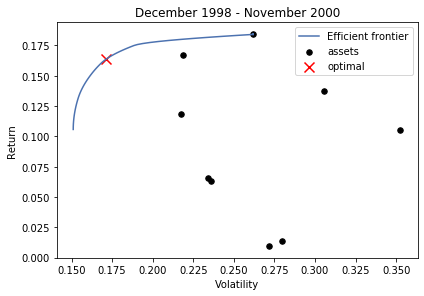

In [17]:
document=Document()
first2=closing[(closing.index.year==1998) | (closing.index.year==1999)| ((closing.index.year<=2000) & (closing.index.month<=11))]
avgRet=mean_historical_return(first2,frequency=250)
covMat=CovarianceShrinkage(first2).ledoit_wolf()
ef=CLA(avgRet,covMat)
wts=ef.max_sharpe()
cleaned_wts=ef.clean_weights()
arr=np.array(ef.portfolio_performance(verbose=True))
eff=EfficientFrontier(avgRet,covMat)
optPortOverTime=optPortOverTime.append({'Beg':'December 1998', 'End':'November 2000','Count':len(first2),'XLB':cleaned_wts['XLB'], 'XLE':cleaned_wts['XLE'], 'XLF':cleaned_wts['XLF'], 'XLI':cleaned_wts['XLI'], 'XLK':cleaned_wts['XLK'], 'XLP':cleaned_wts['XLP'], 'XLU':cleaned_wts['XLU'], 'XLV':cleaned_wts['XLV'], 'XLY':cleaned_wts['XLY'],'Return':arr[0],'Volatility':arr[1]},ignore_index=True)
ax=plotting.plot_efficient_frontier(ef,showfig=False)
ax.set_title("December 1998 - November 2000")
plt.show()
ax.figure.savefig("C://Users//Pratiksha Sharma//Documents//U'Mass Project - Dr. Pohlman//DataFromJupyter//efnew.png",bbox_inches = 'tight')
document.add_picture("C://Users//Pratiksha Sharma//Documents//U'Mass Project - Dr. Pohlman//DataFromJupyter//efnew.png",width=Inches(6),height=Inches(5))    
tab=document.add_table(rows=2,cols=10)
k=0
for key,value in cleaned_wts.items():
    tab.rows[0].cells[k].text=key
    tab.rows[1].cells[k].text=str(value)
    k+=1
document.add_paragraph("Expected Annual Return: "+str(np.round((arr[0]*100),2))+"%")
document.add_paragraph("Annual Volatility: "+str(np.round((arr[1]*100),2))+"%")
document.add_paragraph("Sharpe Ratio: "+str(np.round(arr[2],2)))
document.save("C://Users//Pratiksha Sharma//Documents//U'Mass Project - Dr. Pohlman//DataFromJupyter//efnew.docx")

Expected annual return: 18.9%
Annual volatility: 18.1%
Sharpe Ratio: 0.93


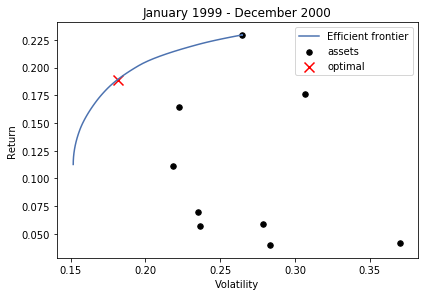

In [13]:
first2=closing[(closing.index.year>=1999) & ((closing.index.year<=2000) & (closing.index.month<=12))]
avgRet=mean_historical_return(first2,frequency=250)
covMat=CovarianceShrinkage(first2).ledoit_wolf()
ef=CLA(avgRet,covMat)
wts=ef.max_sharpe()
cleaned_wts=ef.clean_weights()
arr=np.array(ef.portfolio_performance(verbose=True))
optPortOverTime=optPortOverTime.append({'Beg':'January 1999', 'End':'December 2000','Count':len(first2),'XLB':cleaned_wts['XLB'], 'XLE':cleaned_wts['XLE'], 'XLF':cleaned_wts['XLF'], 'XLI':cleaned_wts['XLI'], 'XLK':cleaned_wts['XLK'], 'XLP':cleaned_wts['XLP'], 'XLU':cleaned_wts['XLU'], 'XLV':cleaned_wts['XLV'], 'XLY':cleaned_wts['XLY'],'Return':arr[0],'Volatility':arr[1]},ignore_index=True)
ax=plotting.plot_efficient_frontier(ef,showfig=False)
ax.set_title("January 1999 - December 2000")
plt.show()
ax.figure.savefig("C://Users//Pratiksha Sharma//Documents//U'Mass Project - Dr. Pohlman//DataFromJupyter//efnew.png",bbox_inches = 'tight')
document.add_picture("C://Users//Pratiksha Sharma//Documents//U'Mass Project - Dr. Pohlman//DataFromJupyter//efnew.png",width=Inches(6),height=Inches(5))    
tab=document.add_closing(rows=2,cols=10)
k=0
for key,value in cleaned_wts.items():
    tab.rows[0].cells[k].text=key
    tab.rows[1].cells[k].text=str(value)
    k+=1
document.add_paragraph("Expected Annual Return: "+str(np.round((arr[0]*100),2))+"%")
document.add_paragraph("Annual Volatility: "+str(np.round((arr[1]*100),2))+"%")
document.add_paragraph("Sharpe Ratio: "+str(np.round(arr[2],2)))
document.save("C://Users//Pratiksha Sharma//Documents//U'Mass Project - Dr. Pohlman//DataFromJupyter//efnew.docx")

Expected annual return: 21.2%
Annual volatility: 19.3%
Sharpe Ratio: 0.99
498


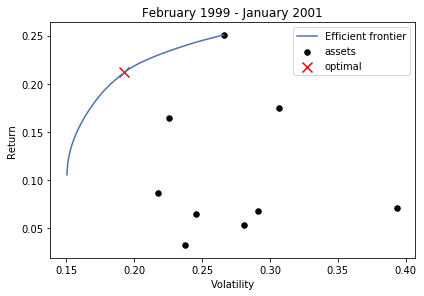

Expected annual return: 19.1%
Annual volatility: 18.3%
Sharpe Ratio: 0.93
498


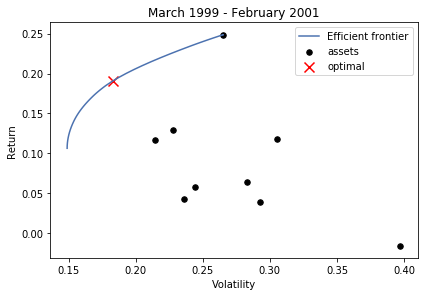

Expected annual return: 14.3%
Annual volatility: 18.6%
Sharpe Ratio: 0.66
497


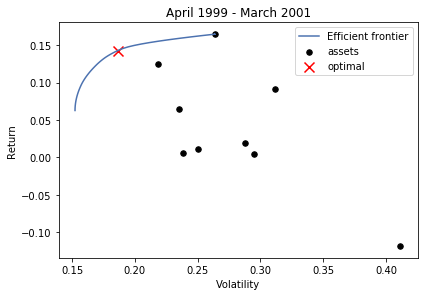

Expected annual return: 11.5%
Annual volatility: 18.5%
Sharpe Ratio: 0.52
496


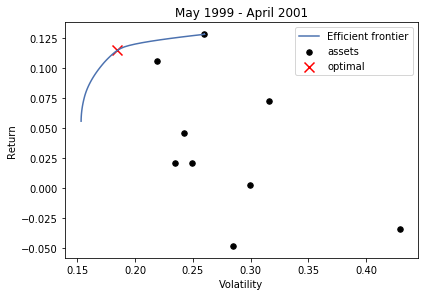

Expected annual return: 13.3%
Annual volatility: 18.1%
Sharpe Ratio: 0.63
498


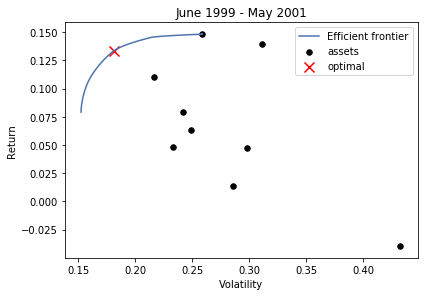

Expected annual return: 8.5%
Annual volatility: 18.4%
Sharpe Ratio: 0.35
497


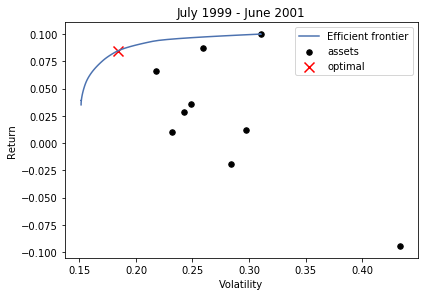

Expected annual return: 10.7%
Annual volatility: 21.1%
Sharpe Ratio: 0.41
497


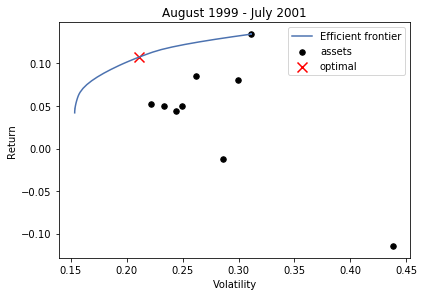

Expected annual return: 8.7%
Annual volatility: 20.4%
Sharpe Ratio: 0.33
498


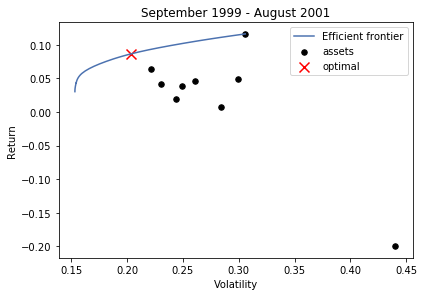

Expected annual return: 9.8%
Annual volatility: 20.9%
Sharpe Ratio: 0.37
492


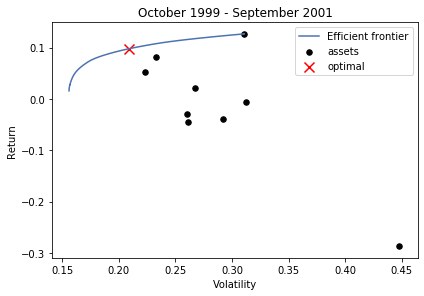

Expected annual return: 4.3%
Annual volatility: 18.6%
Sharpe Ratio: 0.12
494


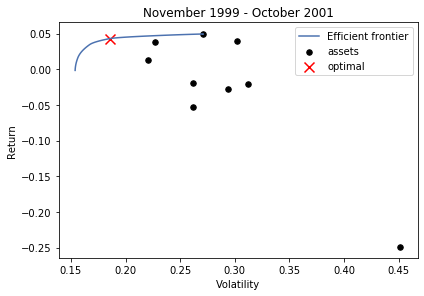

Expected annual return: 7.7%
Annual volatility: 21.2%
Sharpe Ratio: 0.27
494


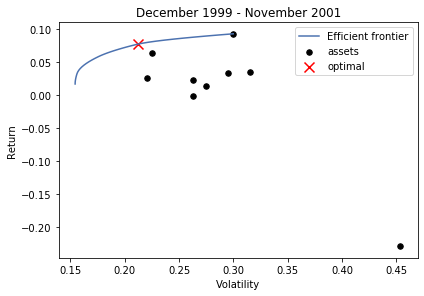

Expected annual return: 9.9%
Annual volatility: 18.1%
Sharpe Ratio: 0.44
492


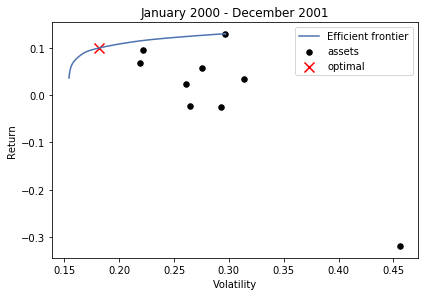

Expected annual return: 9.0%
Annual volatility: 18.7%
Sharpe Ratio: 0.38
493


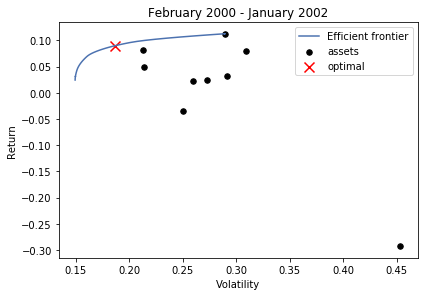

Expected annual return: 14.1%
Annual volatility: 17.1%
Sharpe Ratio: 0.71
492


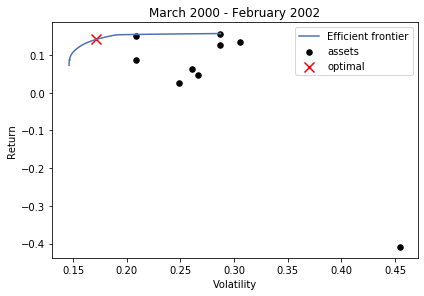

Expected annual return: 10.1%
Annual volatility: 15.2%
Sharpe Ratio: 0.53
489


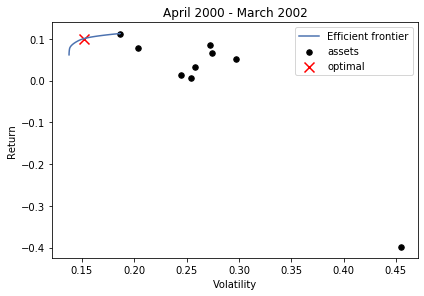

Expected annual return: 8.6%
Annual volatility: 15.7%
Sharpe Ratio: 0.42
493


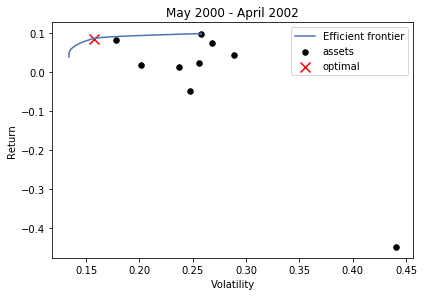

Expected annual return: 8.4%
Annual volatility: 18.4%
Sharpe Ratio: 0.35
493


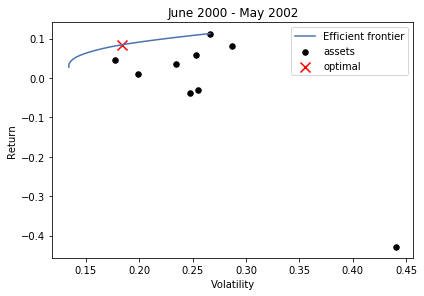

Expected annual return: 13.1%
Annual volatility: 25.2%
Sharpe Ratio: 0.44
491


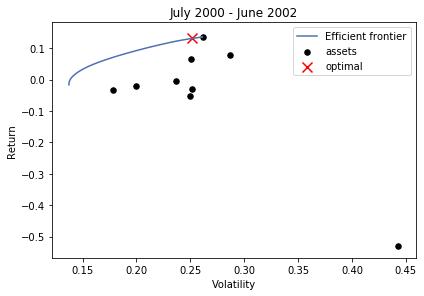

Expected annual return: 8.5%
Annual volatility: 27.1%
Sharpe Ratio: 0.24
493


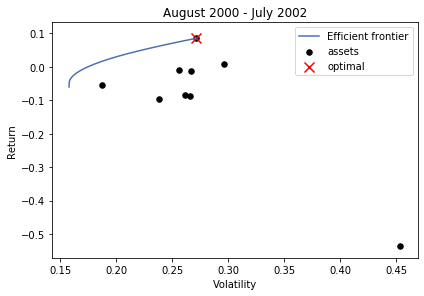

Expected annual return: 7.8%
Annual volatility: 27.6%
Sharpe Ratio: 0.21
494


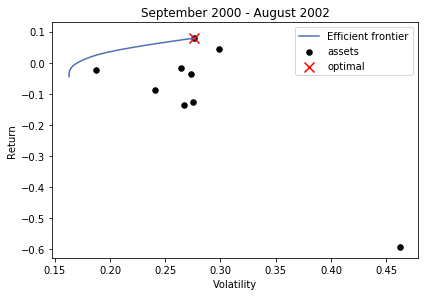

Expected annual return: 6.7%
Annual volatility: 27.6%
Sharpe Ratio: 0.17
499


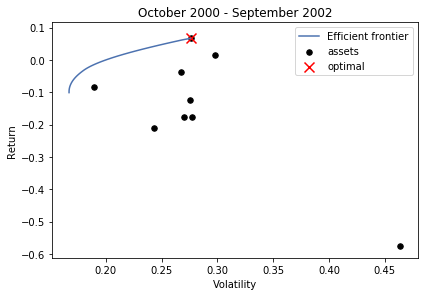

Expected annual return: 4.5%
Annual volatility: 26.6%
Sharpe Ratio: 0.09
500


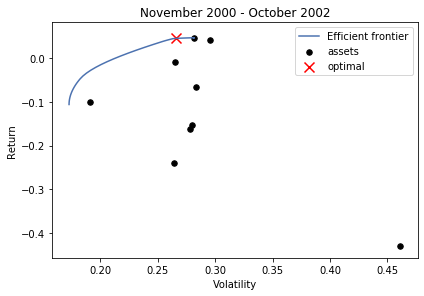

Expected annual return: 9.2%
Annual volatility: 27.0%
Sharpe Ratio: 0.27
499


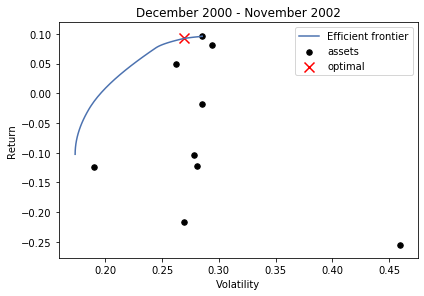

Expected annual return: 4.5%
Annual volatility: 25.1%
Sharpe Ratio: 0.10
500


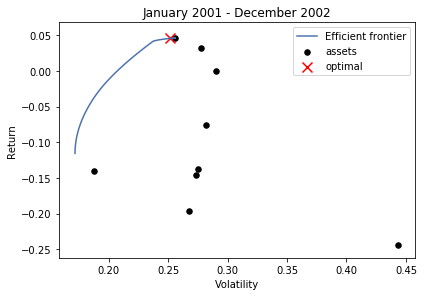

Expected annual return: 0.2%
Annual volatility: 27.5%
Sharpe Ratio: -0.06
500


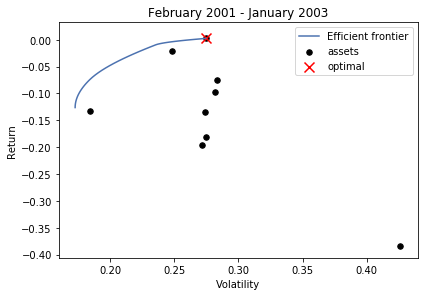

Expected annual return: -1.3%
Annual volatility: 27.3%
Sharpe Ratio: -0.12
500


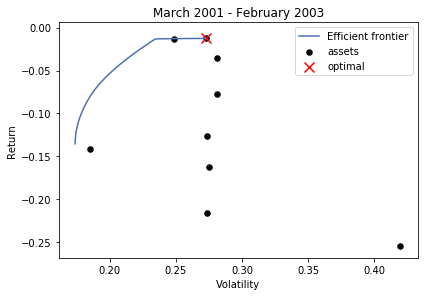

Expected annual return: 4.1%
Annual volatility: 24.5%
Sharpe Ratio: 0.08
499


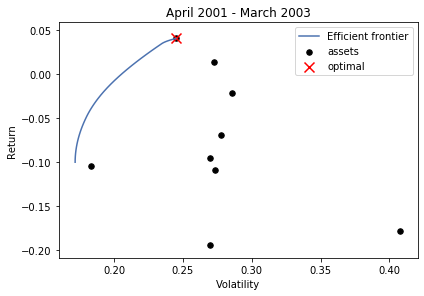

Expected annual return: 0.6%
Annual volatility: 24.2%
Sharpe Ratio: -0.06
500


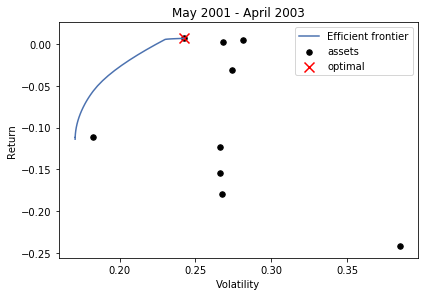

Expected annual return: 2.7%
Annual volatility: 28.2%
Sharpe Ratio: 0.02
499


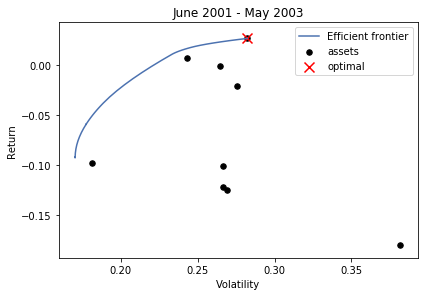

Expected annual return: 3.2%
Annual volatility: 24.3%
Sharpe Ratio: 0.05
499


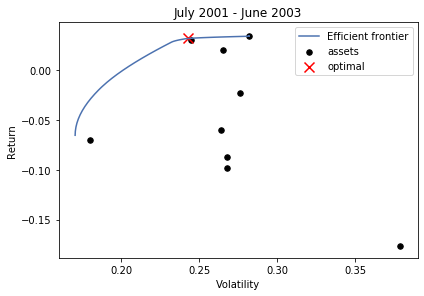

Expected annual return: 6.7%
Annual volatility: 26.3%
Sharpe Ratio: 0.18
500


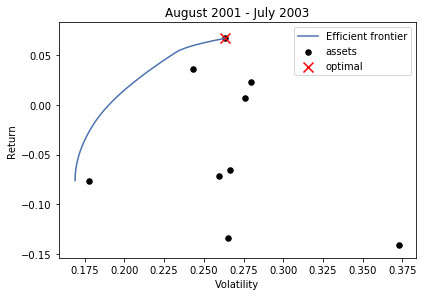

Expected annual return: 8.2%
Annual volatility: 25.5%
Sharpe Ratio: 0.24
498


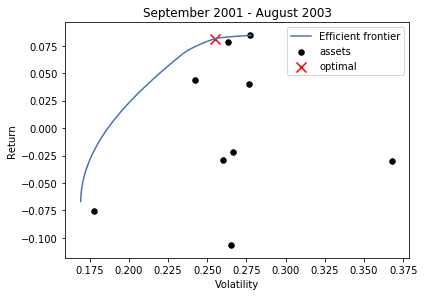

Expected annual return: 12.8%
Annual volatility: 21.8%
Sharpe Ratio: 0.50
504


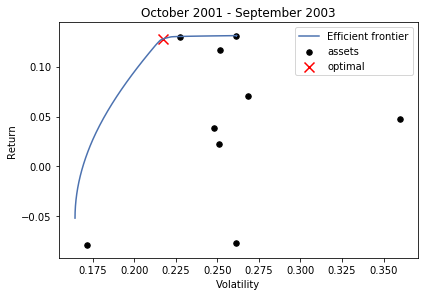

Expected annual return: 13.0%
Annual volatility: 21.7%
Sharpe Ratio: 0.50
504


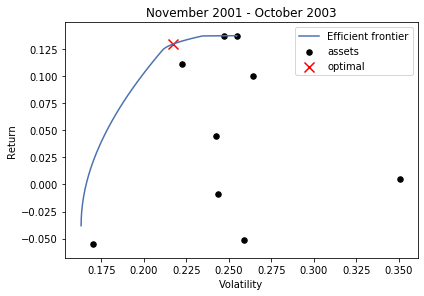

Expected annual return: 9.7%
Annual volatility: 22.4%
Sharpe Ratio: 0.35
502


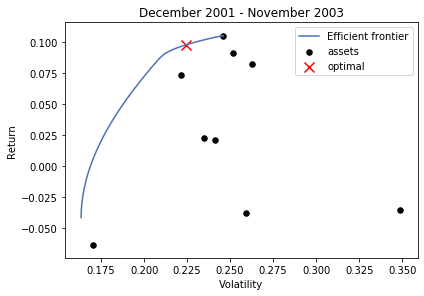

Expected annual return: 15.7%
Annual volatility: 24.4%
Sharpe Ratio: 0.56
504


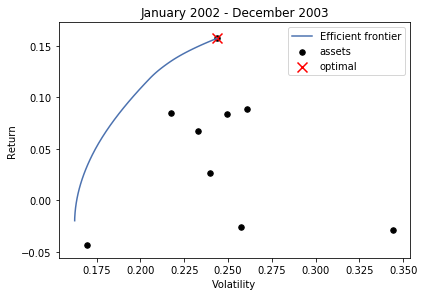

Expected annual return: 11.8%
Annual volatility: 21.0%
Sharpe Ratio: 0.47
503


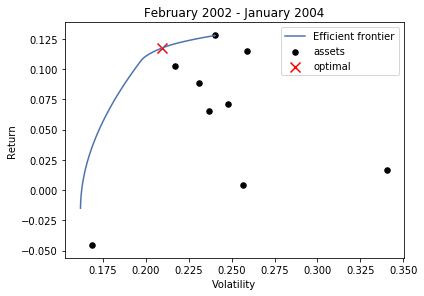

Expected annual return: 11.5%
Annual volatility: 22.0%
Sharpe Ratio: 0.43
503


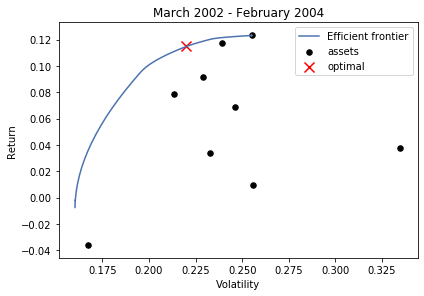

Expected annual return: 10.0%
Annual volatility: 23.4%
Sharpe Ratio: 0.34
506


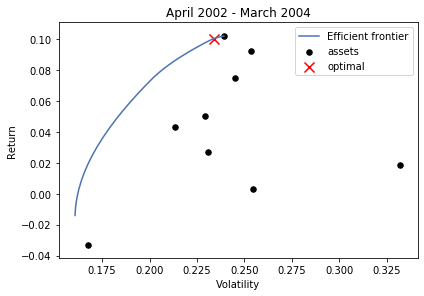

Expected annual return: 9.0%
Annual volatility: 21.7%
Sharpe Ratio: 0.32
505


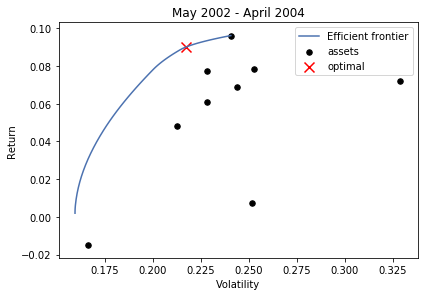

Expected annual return: 10.4%
Annual volatility: 21.4%
Sharpe Ratio: 0.39
503


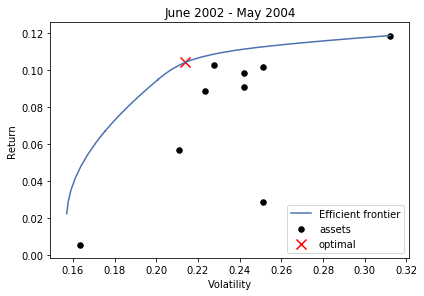

Expected annual return: 16.8%
Annual volatility: 22.8%
Sharpe Ratio: 0.65
504


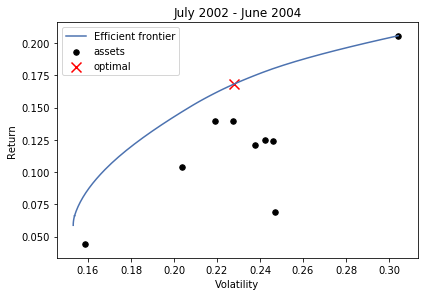

Expected annual return: 24.5%
Annual volatility: 19.5%
Sharpe Ratio: 1.15
503


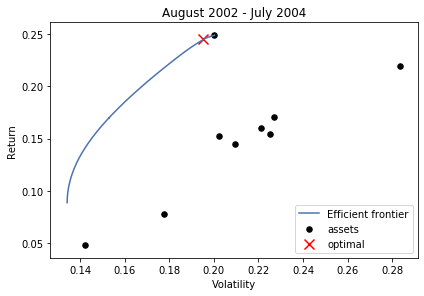

Expected annual return: 21.1%
Annual volatility: 17.2%
Sharpe Ratio: 1.11
503


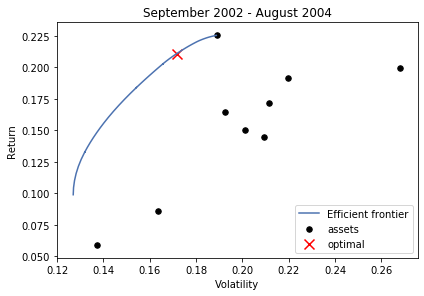

Expected annual return: 25.2%
Annual volatility: 16.0%
Sharpe Ratio: 1.45
504


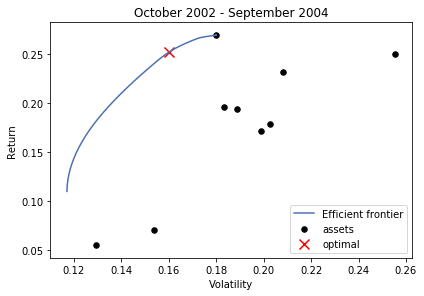

Expected annual return: 24.2%
Annual volatility: 13.5%
Sharpe Ratio: 1.64
502


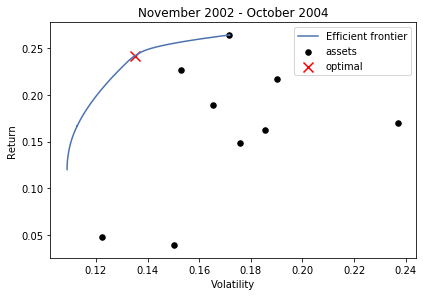

Expected annual return: 26.0%
Annual volatility: 13.1%
Sharpe Ratio: 1.83
503


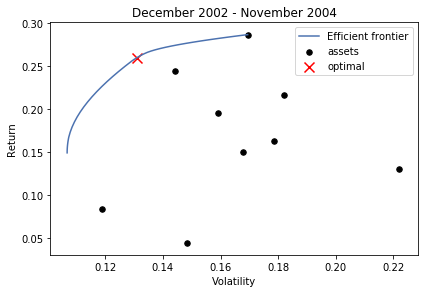

Expected annual return: 23.4%
Annual volatility: 12.5%
Sharpe Ratio: 1.71
504


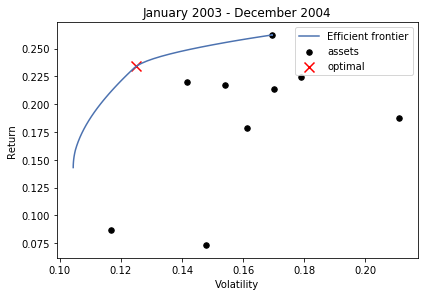

Expected annual return: 26.6%
Annual volatility: 11.8%
Sharpe Ratio: 2.08
503


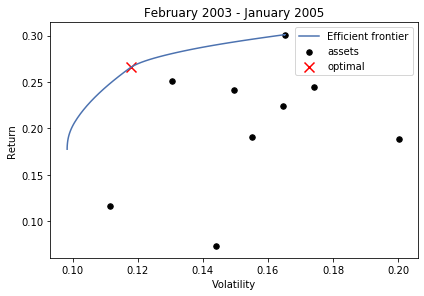

Expected annual return: 31.1%
Annual volatility: 11.8%
Sharpe Ratio: 2.46
503


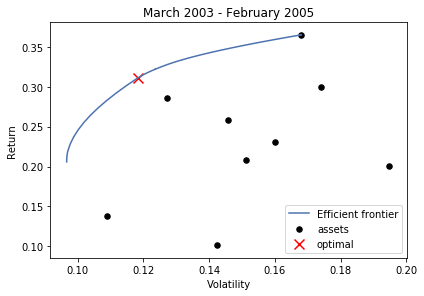

Expected annual return: 28.8%
Annual volatility: 11.6%
Sharpe Ratio: 2.32
504


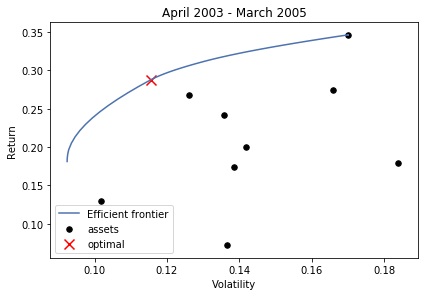

Expected annual return: 26.7%
Annual volatility: 11.9%
Sharpe Ratio: 2.08
504


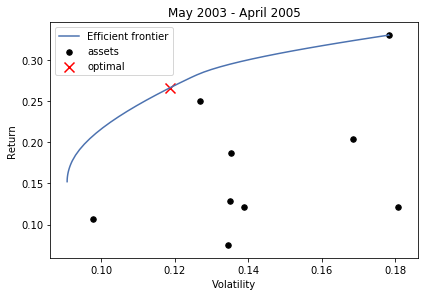

Expected annual return: 22.4%
Annual volatility: 11.8%
Sharpe Ratio: 1.73
504


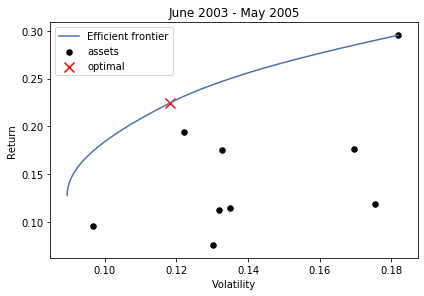

Expected annual return: 26.6%
Annual volatility: 12.4%
Sharpe Ratio: 1.99
505


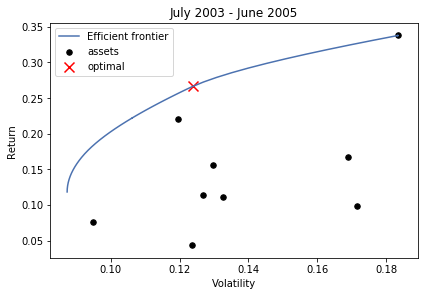

Expected annual return: 30.7%
Annual volatility: 12.1%
Sharpe Ratio: 2.38
503


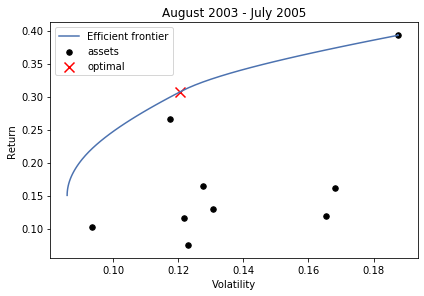

Expected annual return: 30.0%
Annual volatility: 12.4%
Sharpe Ratio: 2.26
505


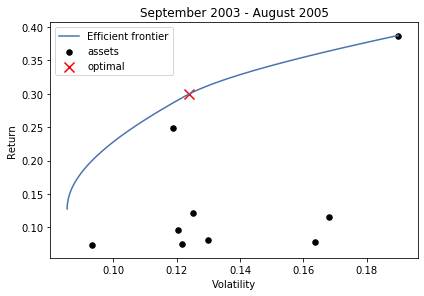

Expected annual return: 32.3%
Annual volatility: 12.8%
Sharpe Ratio: 2.36
505


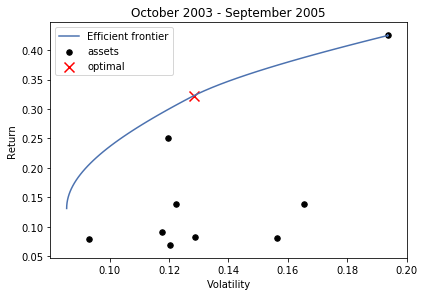

Expected annual return: 29.7%
Annual volatility: 14.8%
Sharpe Ratio: 1.87
503


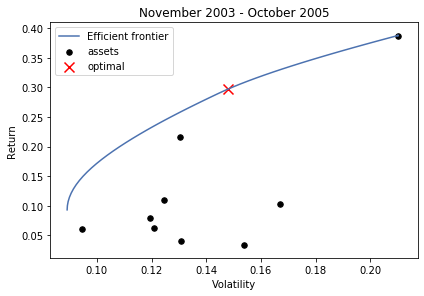

Expected annual return: 28.8%
Annual volatility: 14.6%
Sharpe Ratio: 1.84
505


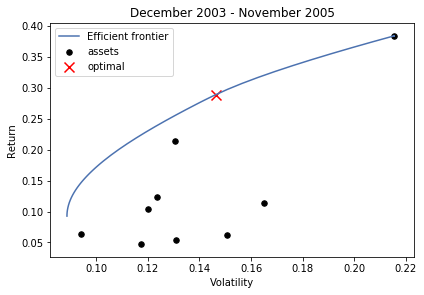

Expected annual return: 25.4%
Annual volatility: 14.6%
Sharpe Ratio: 1.60
504


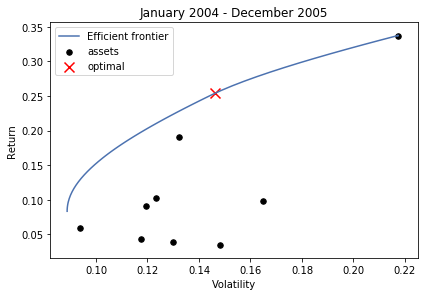

Expected annual return: 29.9%
Annual volatility: 15.9%
Sharpe Ratio: 1.76
504


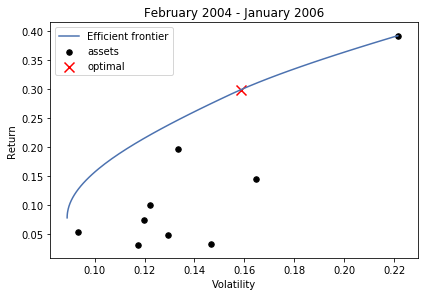

Expected annual return: 22.1%
Annual volatility: 13.8%
Sharpe Ratio: 1.45
504


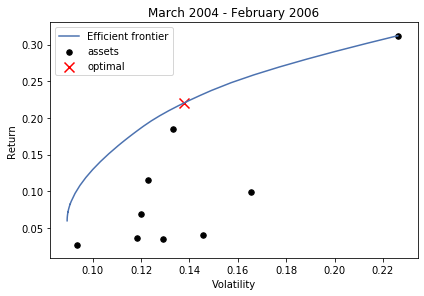

Expected annual return: 23.4%
Annual volatility: 13.8%
Sharpe Ratio: 1.55
504


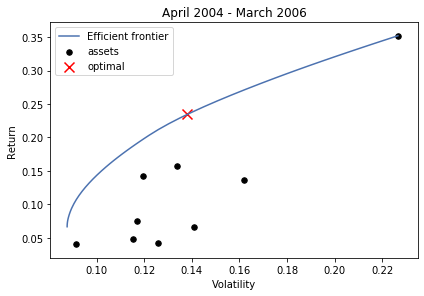

Expected annual return: 22.7%
Annual volatility: 12.8%
Sharpe Ratio: 1.62
502


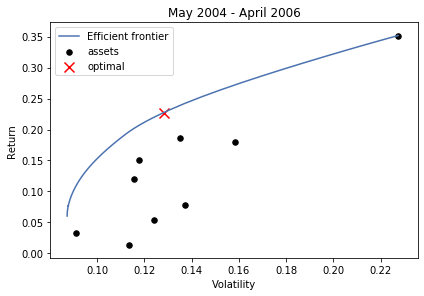

Expected annual return: 22.6%
Annual volatility: 13.2%
Sharpe Ratio: 1.56
504


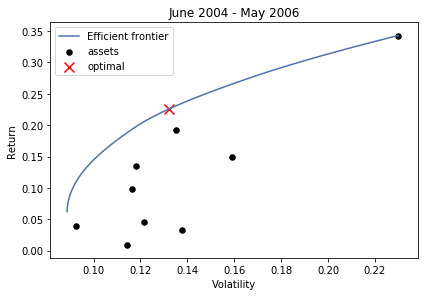

Expected annual return: 23.7%
Annual volatility: 14.4%
Sharpe Ratio: 1.51
505


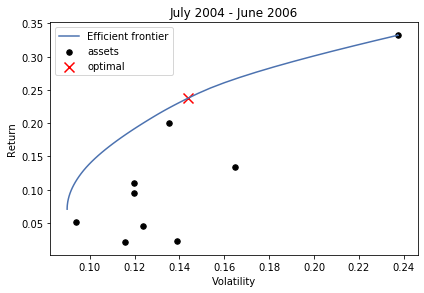

Expected annual return: 24.0%
Annual volatility: 14.2%
Sharpe Ratio: 1.55
504


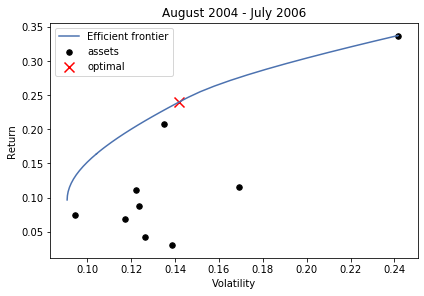

Expected annual return: 20.0%
Annual volatility: 12.3%
Sharpe Ratio: 1.47
505


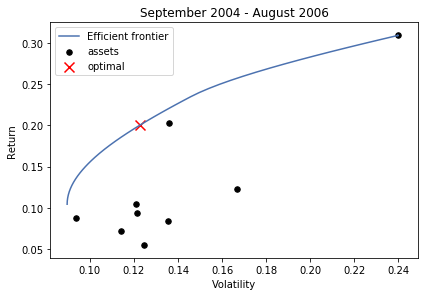

Expected annual return: 16.0%
Annual volatility: 10.6%
Sharpe Ratio: 1.31
504


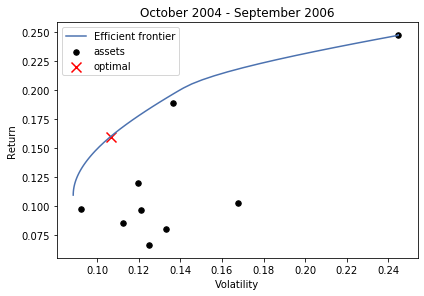

Expected annual return: 16.4%
Annual volatility: 10.2%
Sharpe Ratio: 1.42
505


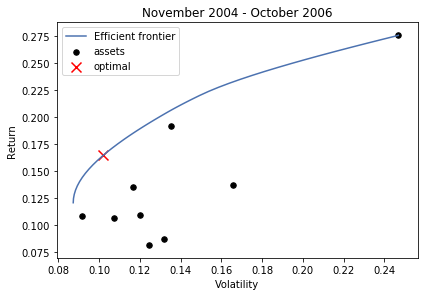

Expected annual return: 18.1%
Annual volatility: 11.5%
Sharpe Ratio: 1.40
505


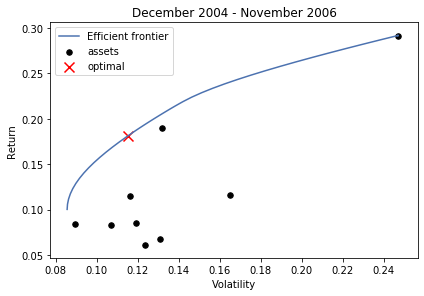

Expected annual return: 18.5%
Annual volatility: 11.7%
Sharpe Ratio: 1.41
503


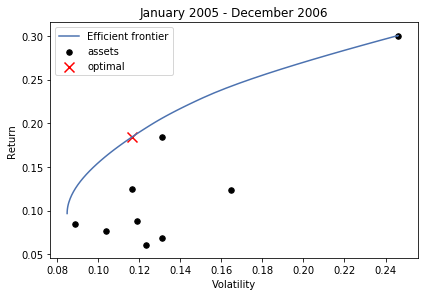

Expected annual return: 15.2%
Annual volatility: 10.4%
Sharpe Ratio: 1.27
503


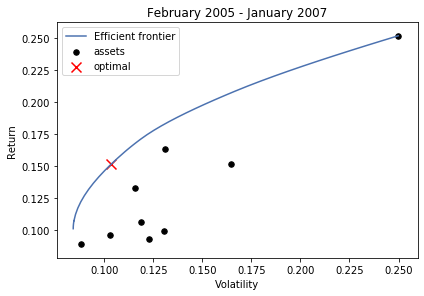

Expected annual return: 16.4%
Annual volatility: 11.6%
Sharpe Ratio: 1.24
503


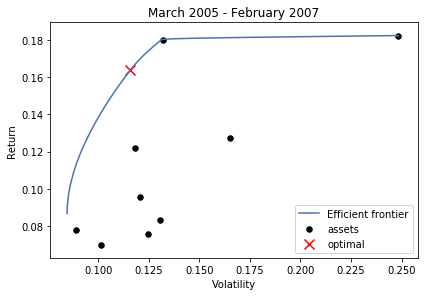

Expected annual return: 16.8%
Annual volatility: 10.7%
Sharpe Ratio: 1.38
503


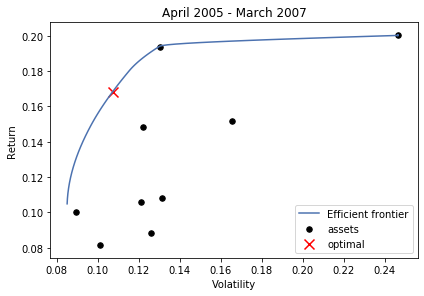

Expected annual return: 17.4%
Annual volatility: 10.1%
Sharpe Ratio: 1.53
502


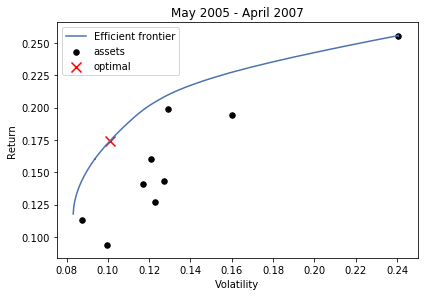

Expected annual return: 18.6%
Annual volatility: 10.6%
Sharpe Ratio: 1.58
503


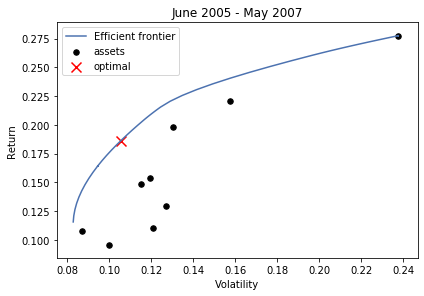

Expected annual return: 17.2%
Annual volatility: 10.6%
Sharpe Ratio: 1.43
502


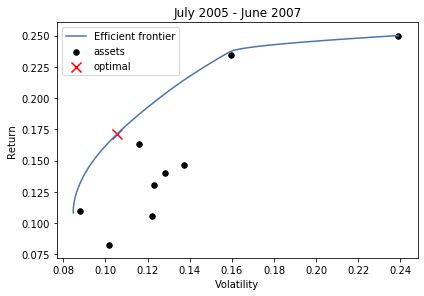

Expected annual return: 16.5%
Annual volatility: 12.0%
Sharpe Ratio: 1.21
503


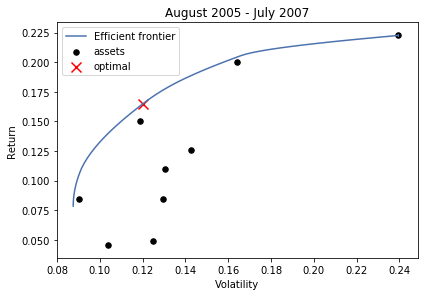

Expected annual return: 16.4%
Annual volatility: 12.0%
Sharpe Ratio: 1.20
503


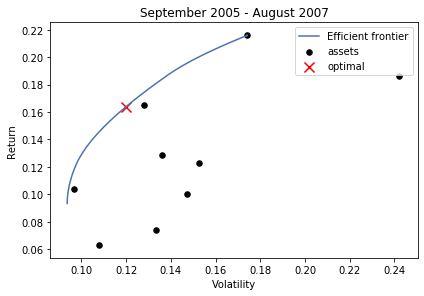

Expected annual return: 18.9%
Annual volatility: 12.5%
Sharpe Ratio: 1.35
501


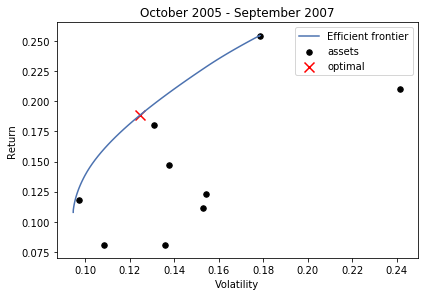

Expected annual return: 20.1%
Annual volatility: 12.0%
Sharpe Ratio: 1.52
503


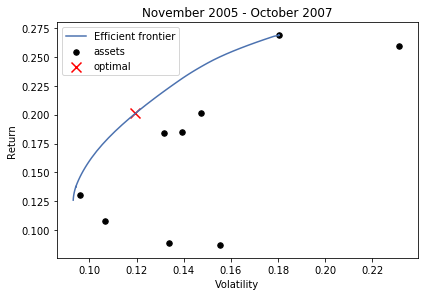

Expected annual return: 15.9%
Annual volatility: 10.9%
Sharpe Ratio: 1.28
503


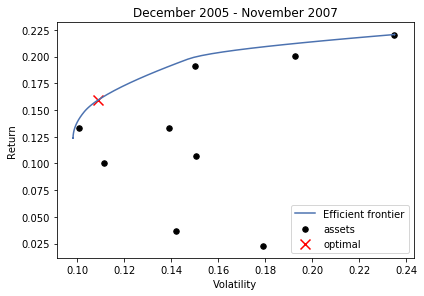

Expected annual return: 16.1%
Annual volatility: 11.3%
Sharpe Ratio: 1.24
502


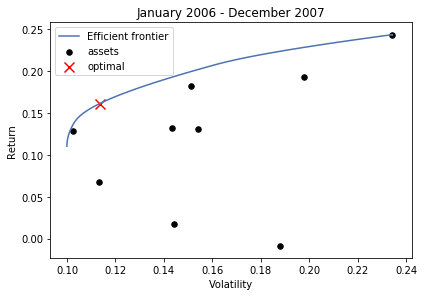

Expected annual return: 12.1%
Annual volatility: 11.8%
Sharpe Ratio: 0.86
503


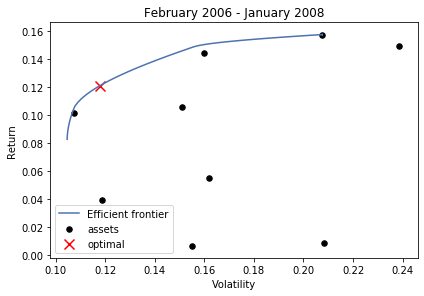

Expected annual return: 13.8%
Annual volatility: 13.2%
Sharpe Ratio: 0.90
504


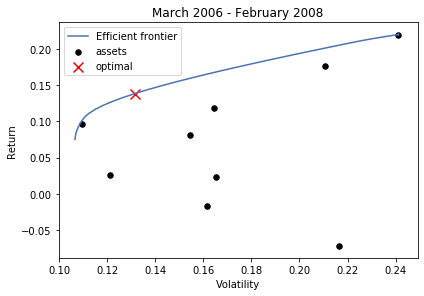

Expected annual return: 13.2%
Annual volatility: 12.4%
Sharpe Ratio: 0.90
501


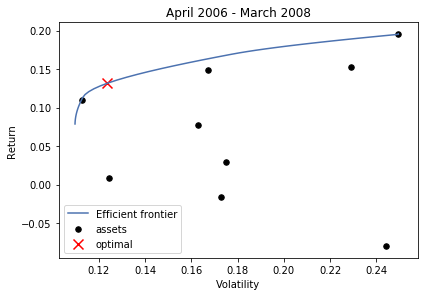

Expected annual return: 15.2%
Annual volatility: 13.5%
Sharpe Ratio: 0.98
504


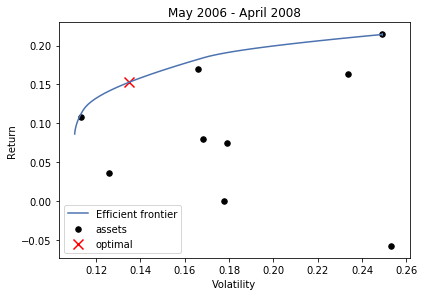

Expected annual return: 17.1%
Annual volatility: 13.9%
Sharpe Ratio: 1.09
503


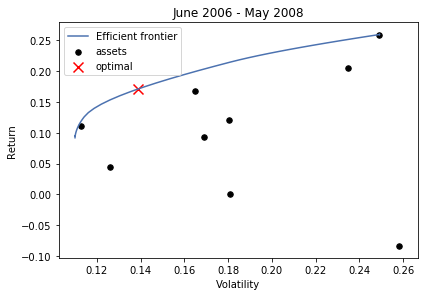

Expected annual return: 20.5%
Annual volatility: 18.0%
Sharpe Ratio: 1.03
502


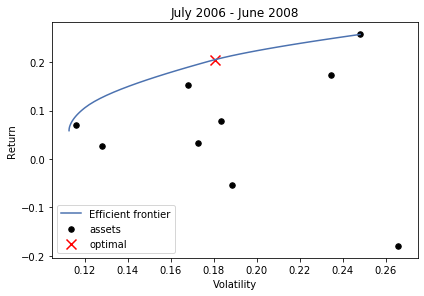

Expected annual return: 12.4%
Annual volatility: 14.5%
Sharpe Ratio: 0.72
504


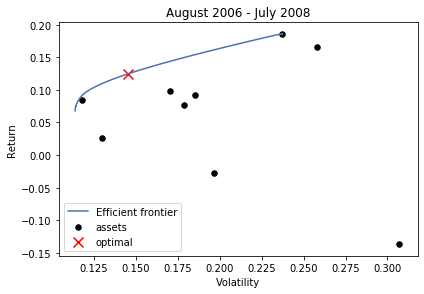

Expected annual return: 11.7%
Annual volatility: 14.7%
Sharpe Ratio: 0.66
502


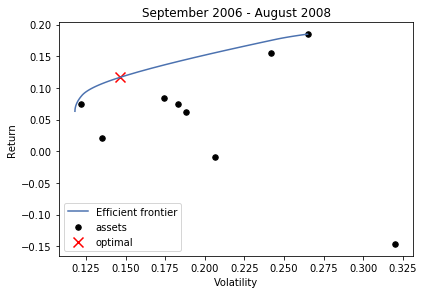

Expected annual return: 9.3%
Annual volatility: 14.4%
Sharpe Ratio: 0.51
503


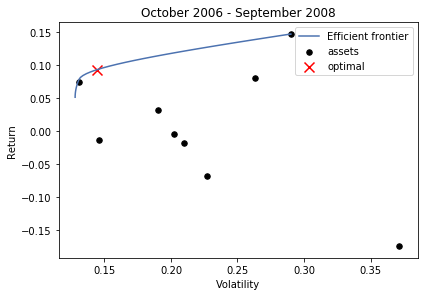

Expected annual return: 4.5%
Annual volatility: 34.1%
Sharpe Ratio: 0.07
504


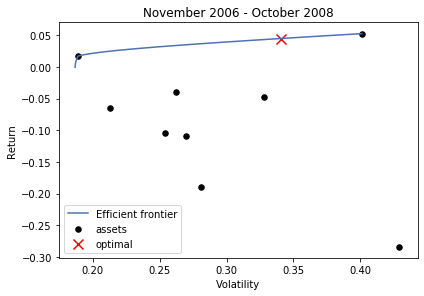

Expected annual return: 1.2%
Annual volatility: 21.8%
Sharpe Ratio: -0.04
502


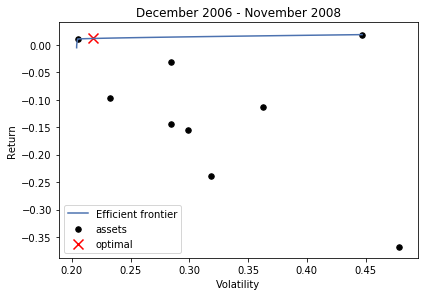

Expected annual return: 3.6%
Annual volatility: 46.1%
Sharpe Ratio: 0.04
504


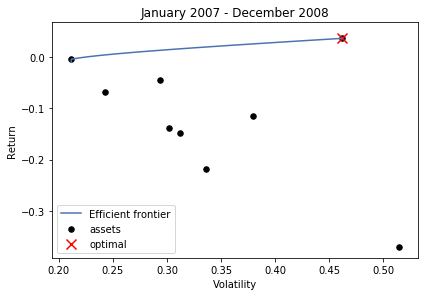

Expected annual return: 1.4%
Annual volatility: 47.1%
Sharpe Ratio: -0.01
504


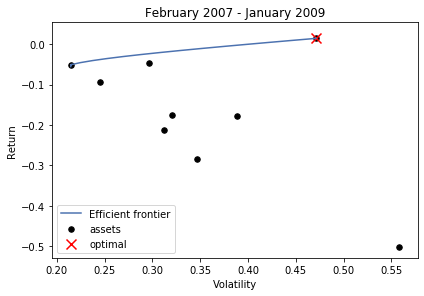

Expected annual return: -3.4%
Annual volatility: 47.8%
Sharpe Ratio: -0.11
504


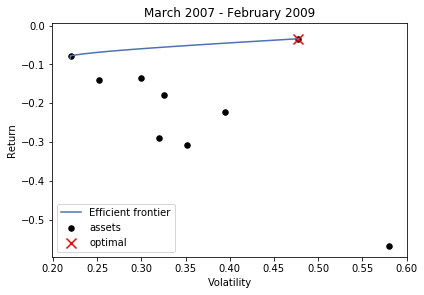

Expected annual return: -4.6%
Annual volatility: 49.0%
Sharpe Ratio: -0.13
504


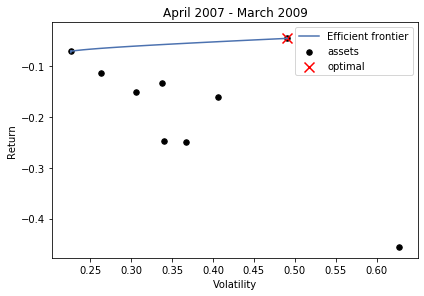

Expected annual return: -2.9%
Annual volatility: 49.5%
Sharpe Ratio: -0.10
505


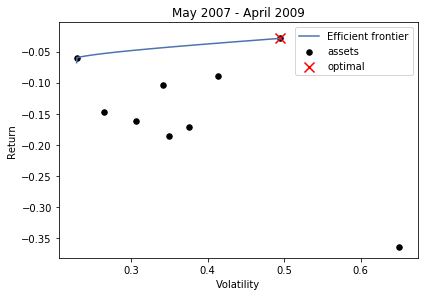

Expected annual return: -0.5%
Annual volatility: 50.1%
Sharpe Ratio: -0.05
503


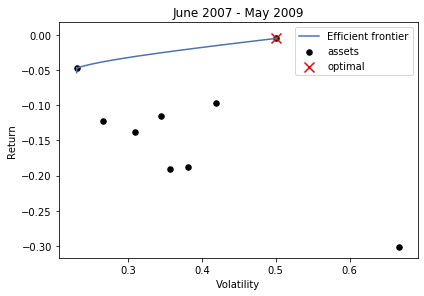

Expected annual return: -3.5%
Annual volatility: 23.2%
Sharpe Ratio: -0.23
504


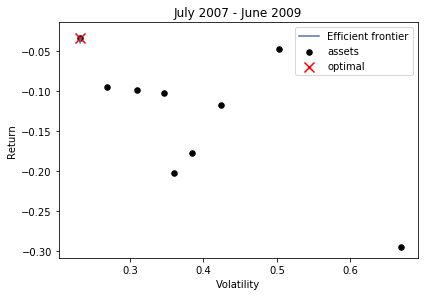

Expected annual return: 0.8%
Annual volatility: 23.2%
Sharpe Ratio: -0.05
505


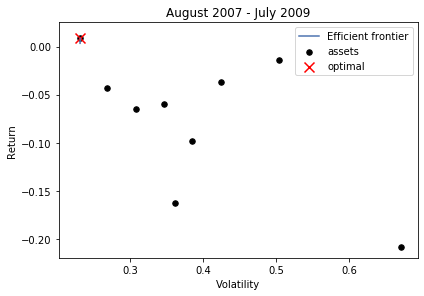

Expected annual return: 0.6%
Annual volatility: 23.1%
Sharpe Ratio: -0.06
503


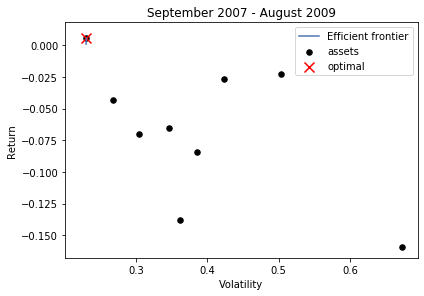

Expected annual return: 0.6%
Annual volatility: 23.0%
Sharpe Ratio: -0.06
505


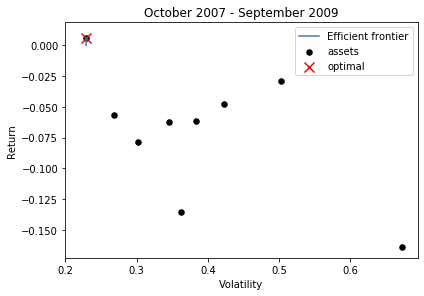

Expected annual return: 1.3%
Annual volatility: 23.0%
Sharpe Ratio: -0.03
504


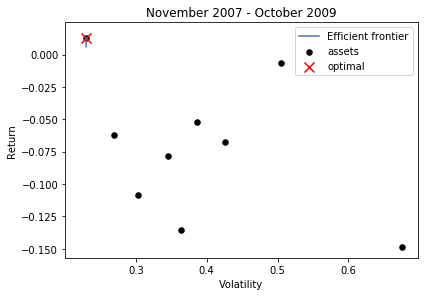

Expected annual return: 0.9%
Annual volatility: 22.9%
Sharpe Ratio: -0.05
503


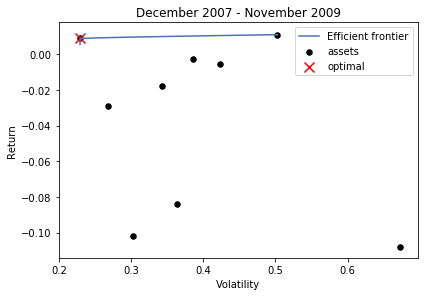

Expected annual return: 5.3%
Annual volatility: 38.4%
Sharpe Ratio: 0.08
505


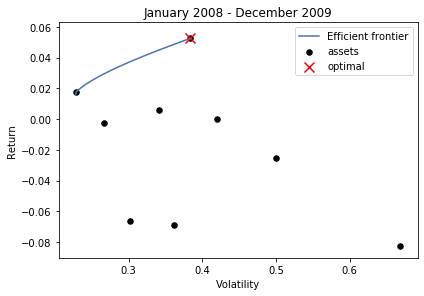

Expected annual return: 2.8%
Annual volatility: 22.7%
Sharpe Ratio: 0.04
503


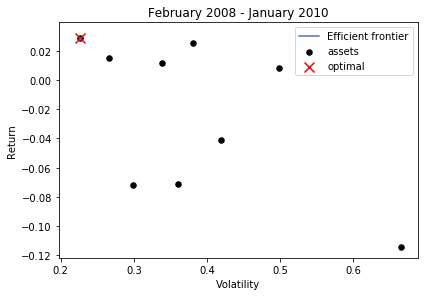

Expected annual return: 5.9%
Annual volatility: 27.6%
Sharpe Ratio: 0.14
502


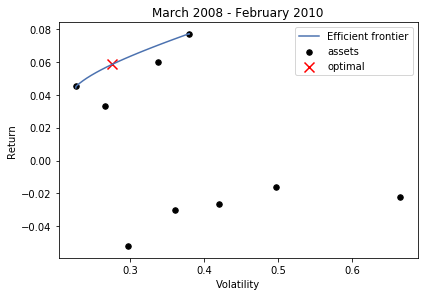

Expected annual return: 8.5%
Annual volatility: 32.1%
Sharpe Ratio: 0.20
505


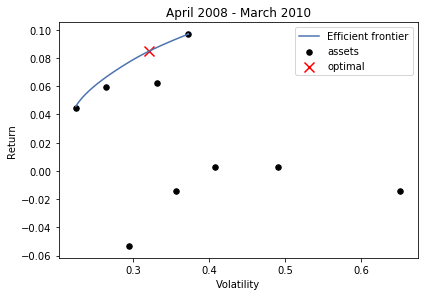

Expected annual return: 10.6%
Annual volatility: 37.2%
Sharpe Ratio: 0.23
504


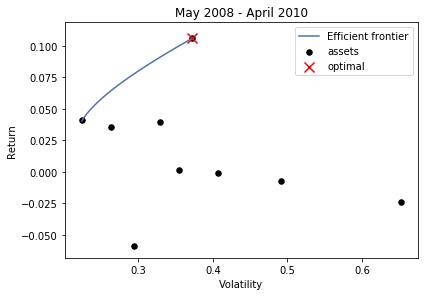

Expected annual return: 9.4%
Annual volatility: 37.8%
Sharpe Ratio: 0.19
503


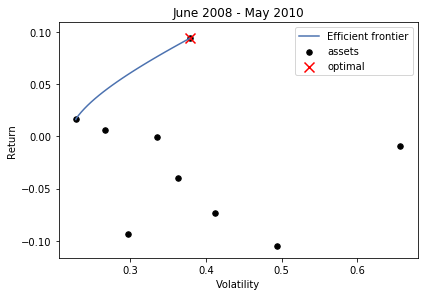

Expected annual return: 10.2%
Annual volatility: 37.7%
Sharpe Ratio: 0.22
504


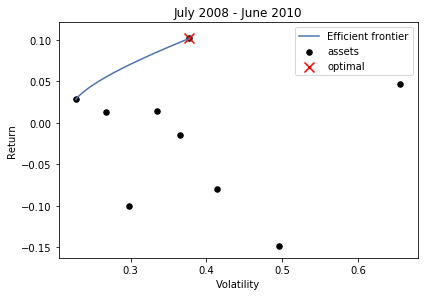

Expected annual return: 13.8%
Annual volatility: 37.6%
Sharpe Ratio: 0.31
503


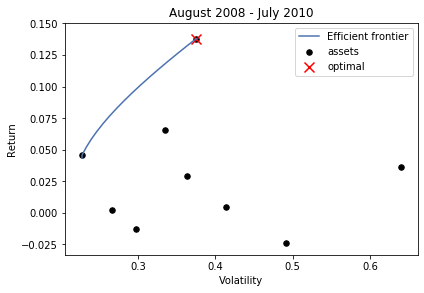

Expected annual return: 7.1%
Annual volatility: 37.1%
Sharpe Ratio: 0.14
504


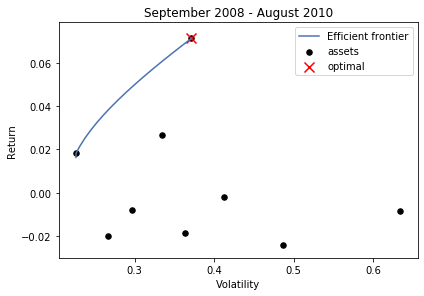

Expected annual return: 16.3%
Annual volatility: 33.6%
Sharpe Ratio: 0.43
504


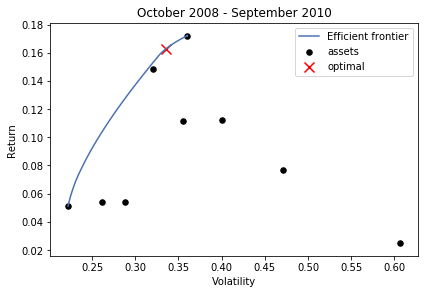

Expected annual return: 27.7%
Annual volatility: 29.7%
Sharpe Ratio: 0.87
502


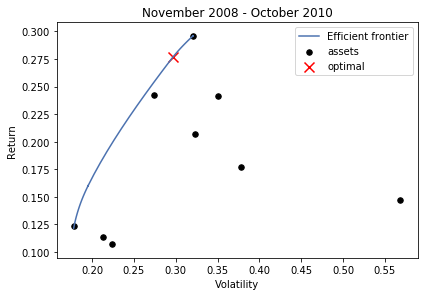

Expected annual return: 35.9%
Annual volatility: 25.9%
Sharpe Ratio: 1.31
504


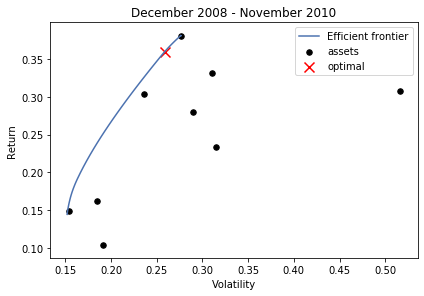

Expected annual return: 28.0%
Annual volatility: 23.0%
Sharpe Ratio: 1.13
504


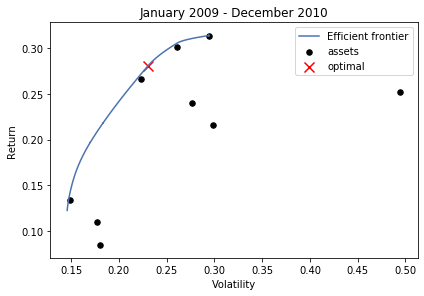

Expected annual return: 33.9%
Annual volatility: 21.8%
Sharpe Ratio: 1.46
504


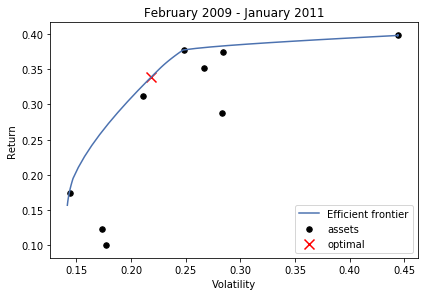

Expected annual return: 36.1%
Annual volatility: 18.0%
Sharpe Ratio: 1.90
504


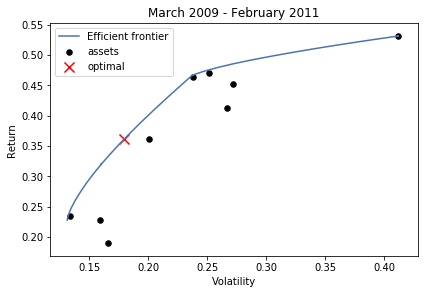

Expected annual return: 28.2%
Annual volatility: 15.5%
Sharpe Ratio: 1.69
505


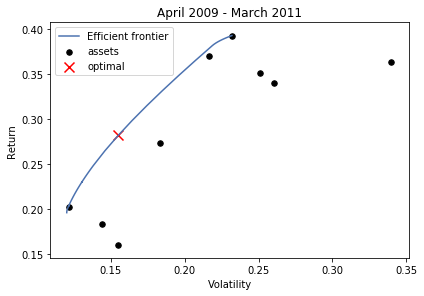

Expected annual return: 22.5%
Annual volatility: 12.2%
Sharpe Ratio: 1.68
504


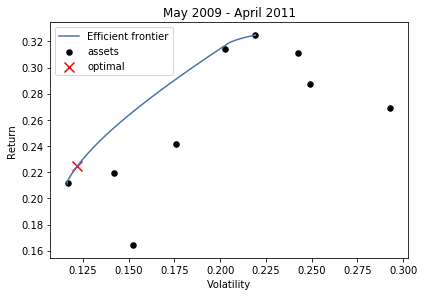

Expected annual return: 21.1%
Annual volatility: 12.2%
Sharpe Ratio: 1.57
505


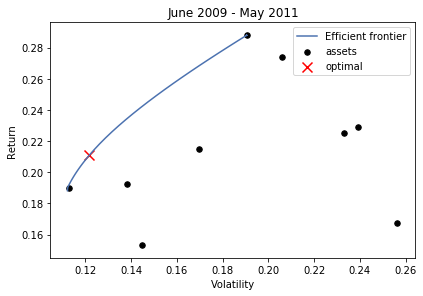

Expected annual return: 22.7%
Annual volatility: 13.3%
Sharpe Ratio: 1.56
505


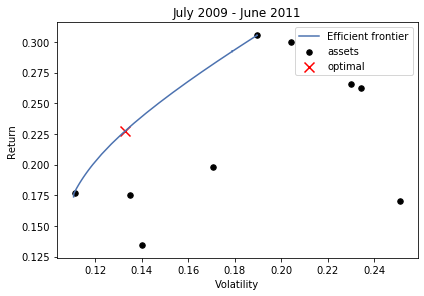

Expected annual return: 18.2%
Annual volatility: 12.8%
Sharpe Ratio: 1.26
503


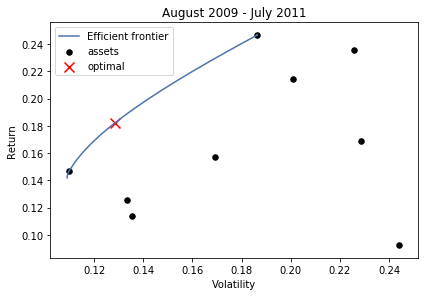

Expected annual return: 16.5%
Annual volatility: 13.6%
Sharpe Ratio: 1.06
505


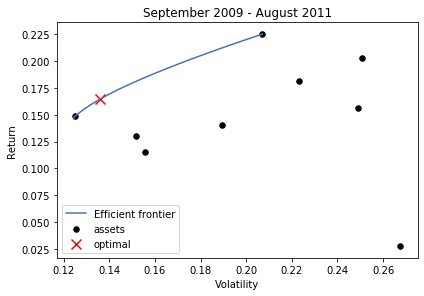

Expected annual return: 12.4%
Annual volatility: 13.5%
Sharpe Ratio: 0.77
505


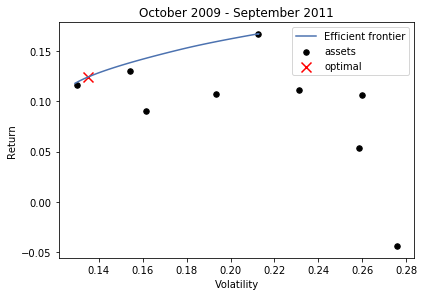

Expected annual return: 18.0%
Annual volatility: 16.7%
Sharpe Ratio: 0.96
504


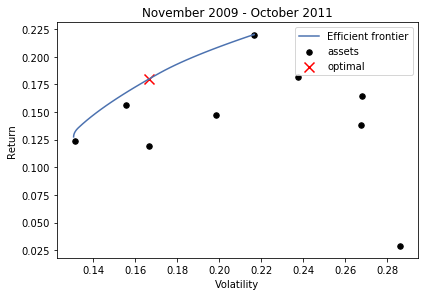

Expected annual return: 13.2%
Annual volatility: 14.6%
Sharpe Ratio: 0.77
505


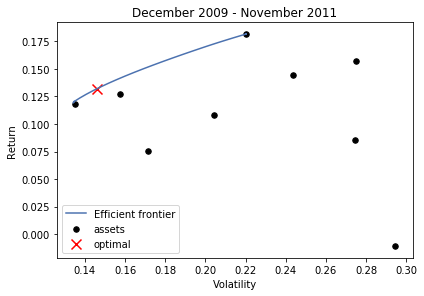

Expected annual return: 13.3%
Annual volatility: 13.5%
Sharpe Ratio: 0.84
504


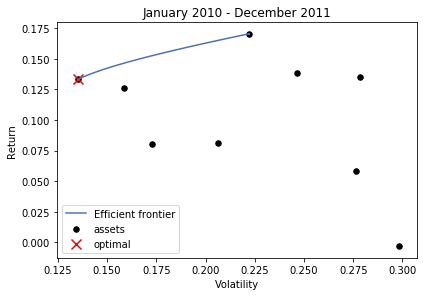

Expected annual return: 15.7%
Annual volatility: 15.5%
Sharpe Ratio: 0.88
505


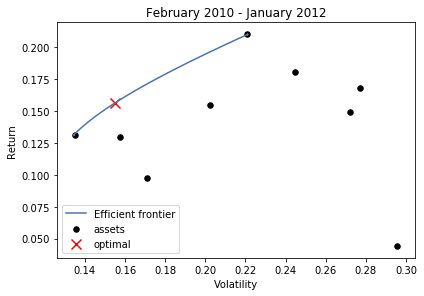

Expected annual return: 14.6%
Annual volatility: 14.2%
Sharpe Ratio: 0.89
506


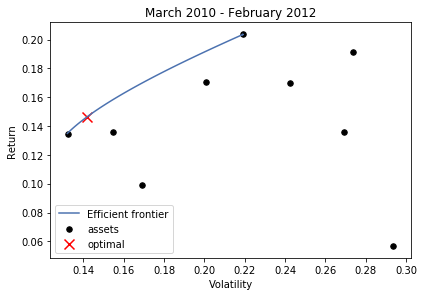

Expected annual return: 13.9%
Annual volatility: 13.8%
Sharpe Ratio: 0.86
505


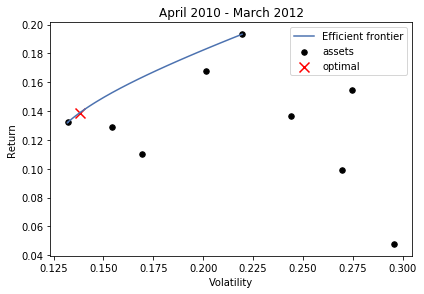

Expected annual return: 14.0%
Annual volatility: 13.3%
Sharpe Ratio: 0.90
504


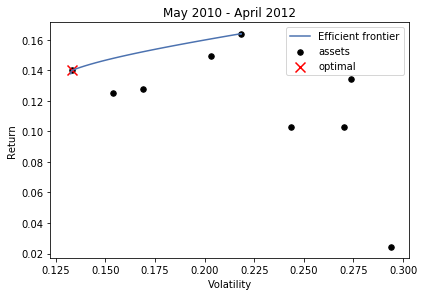

Expected annual return: 16.3%
Annual volatility: 12.6%
Sharpe Ratio: 1.13
506


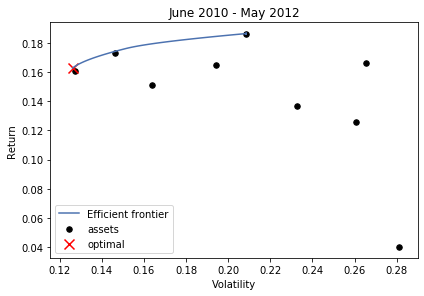

Expected annual return: 18.8%
Annual volatility: 12.3%
Sharpe Ratio: 1.36
505


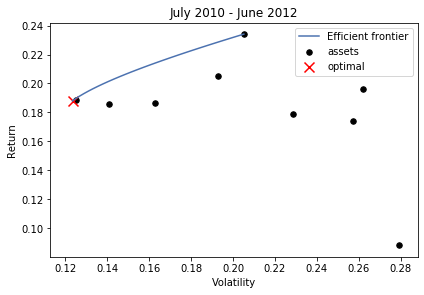

Expected annual return: 16.8%
Annual volatility: 12.3%
Sharpe Ratio: 1.20
505


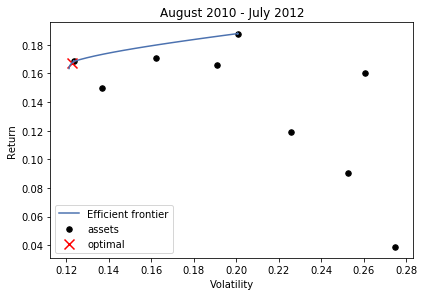

Expected annual return: 17.2%
Annual volatility: 12.3%
Sharpe Ratio: 1.24
506


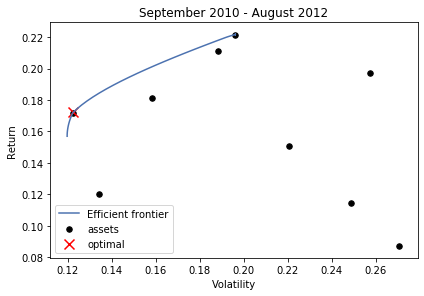

Expected annual return: 15.9%
Annual volatility: 12.3%
Sharpe Ratio: 1.13
504


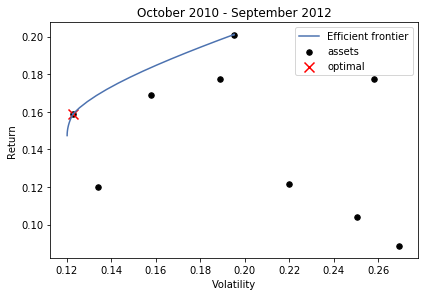

Expected annual return: 13.9%
Annual volatility: 12.1%
Sharpe Ratio: 0.98
504


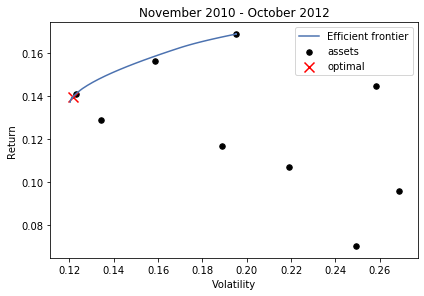

Expected annual return: 14.9%
Annual volatility: 12.4%
Sharpe Ratio: 1.03
504


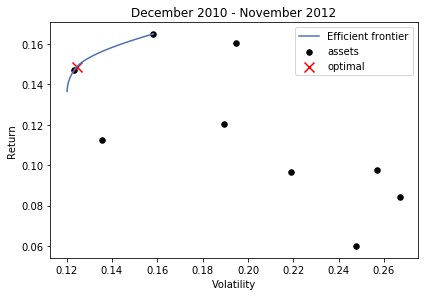

Expected annual return: 12.9%
Annual volatility: 12.9%
Sharpe Ratio: 0.85
502


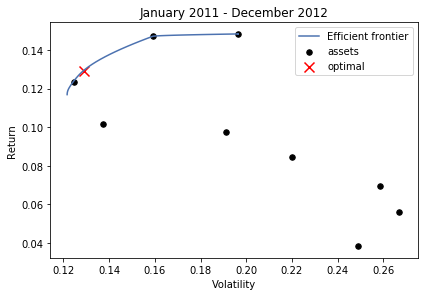

Expected annual return: 15.8%
Annual volatility: 12.7%
Sharpe Ratio: 1.09
503


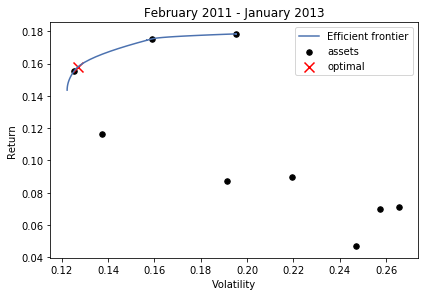

Expected annual return: 16.5%
Annual volatility: 12.6%
Sharpe Ratio: 1.15
503


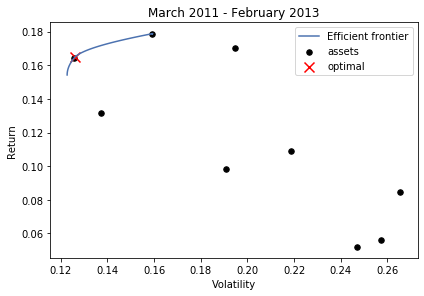

Expected annual return: 17.8%
Annual volatility: 12.6%
Sharpe Ratio: 1.26
500


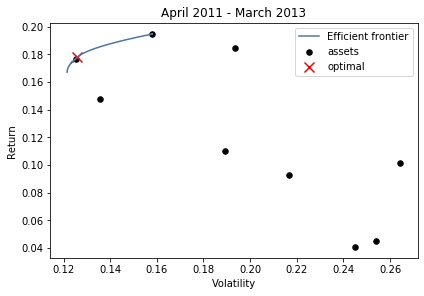

Expected annual return: 16.5%
Annual volatility: 12.3%
Sharpe Ratio: 1.18
502


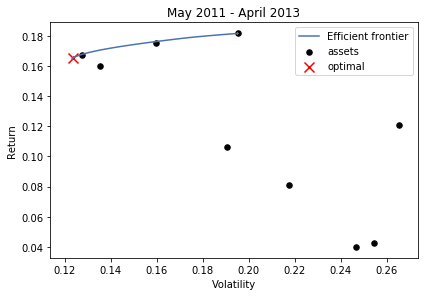

Expected annual return: 16.8%
Annual volatility: 14.0%
Sharpe Ratio: 1.06
503


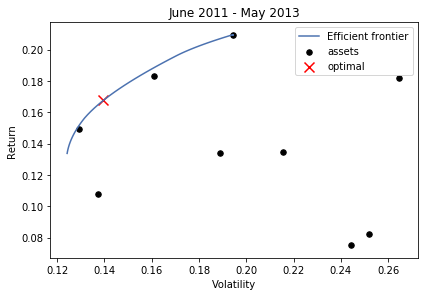

Expected annual return: 15.8%
Annual volatility: 13.5%
Sharpe Ratio: 1.02
501


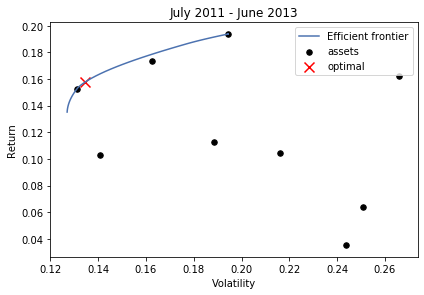

Expected annual return: 22.1%
Annual volatility: 14.4%
Sharpe Ratio: 1.39
503


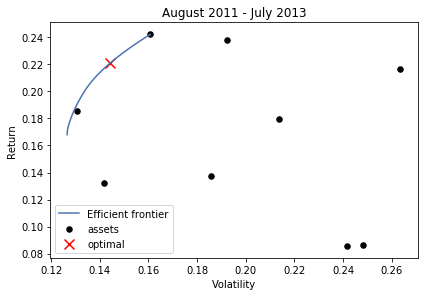

Expected annual return: 23.3%
Annual volatility: 14.1%
Sharpe Ratio: 1.52
502


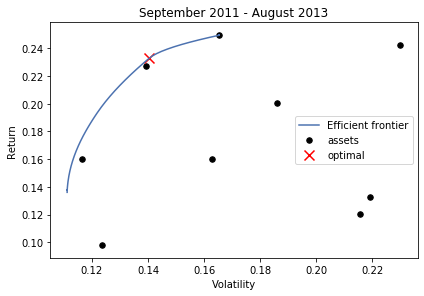

Expected annual return: 29.3%
Annual volatility: 13.2%
Sharpe Ratio: 2.07
501


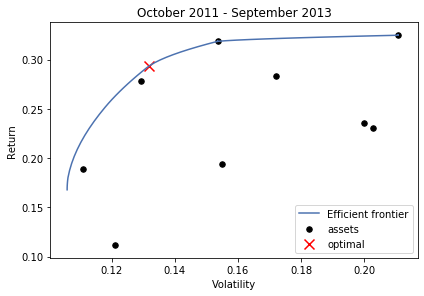

Expected annual return: 26.1%
Annual volatility: 12.2%
Sharpe Ratio: 1.98
503


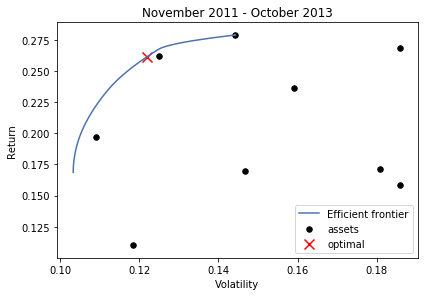

Expected annual return: 27.5%
Annual volatility: 11.6%
Sharpe Ratio: 2.20
502


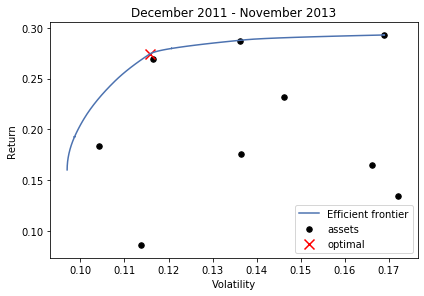

Expected annual return: 26.8%
Annual volatility: 11.6%
Sharpe Ratio: 2.14
502


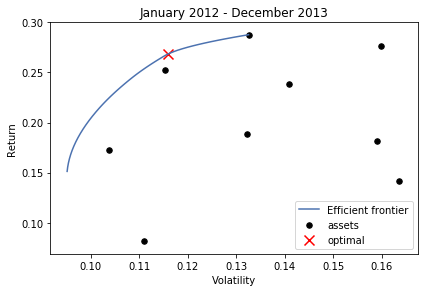

Expected annual return: 24.2%
Annual volatility: 11.7%
Sharpe Ratio: 1.89
503


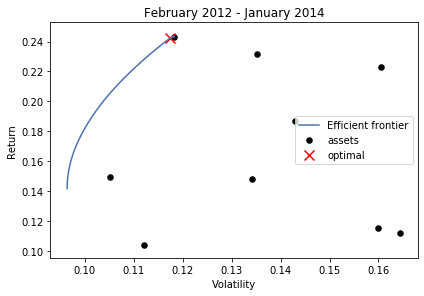

Expected annual return: 27.1%
Annual volatility: 12.1%
Sharpe Ratio: 2.08
502


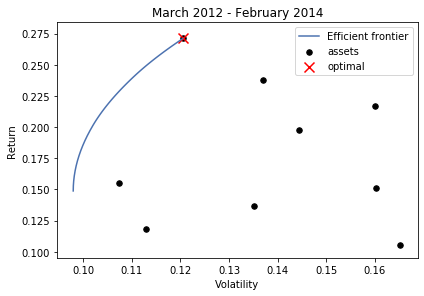

Expected annual return: 23.9%
Annual volatility: 11.9%
Sharpe Ratio: 1.83
501


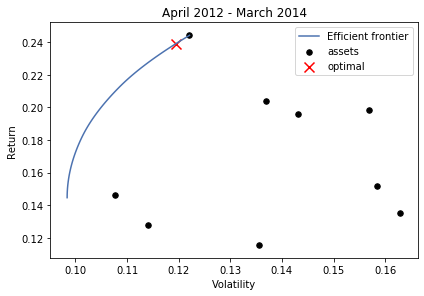

Expected annual return: 22.5%
Annual volatility: 11.5%
Sharpe Ratio: 1.79
502


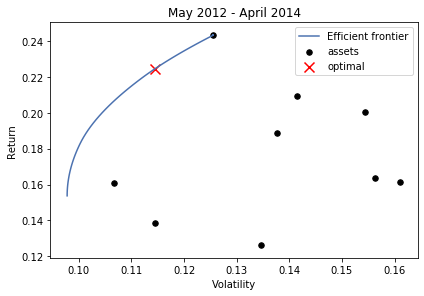

Expected annual return: 28.3%
Annual volatility: 12.2%
Sharpe Ratio: 2.16
501


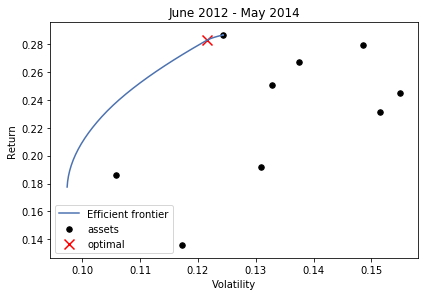

Expected annual return: 25.0%
Annual volatility: 11.5%
Sharpe Ratio: 1.99
501


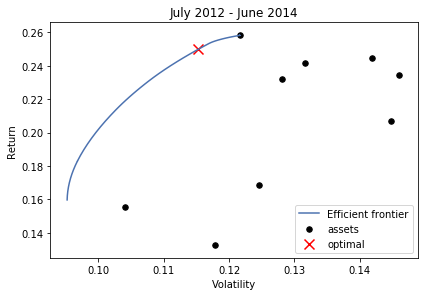

Expected annual return: 25.0%
Annual volatility: 11.7%
Sharpe Ratio: 1.96
502


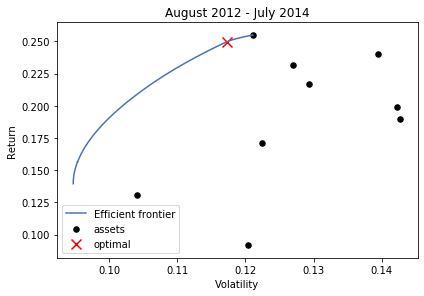

Expected annual return: 26.1%
Annual volatility: 11.6%
Sharpe Ratio: 2.08
500


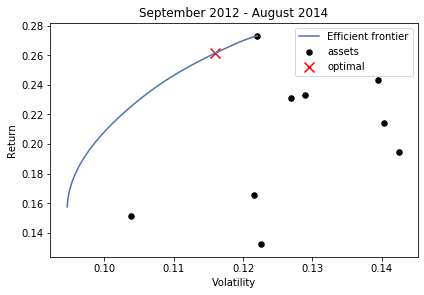

Expected annual return: 24.3%
Annual volatility: 11.7%
Sharpe Ratio: 1.90
502


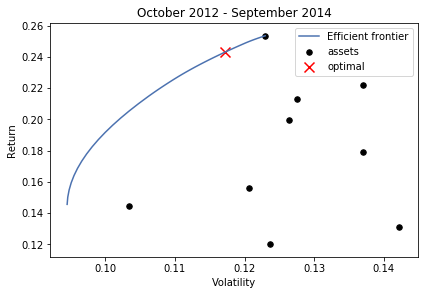

Expected annual return: 25.9%
Annual volatility: 11.9%
Sharpe Ratio: 2.02
504


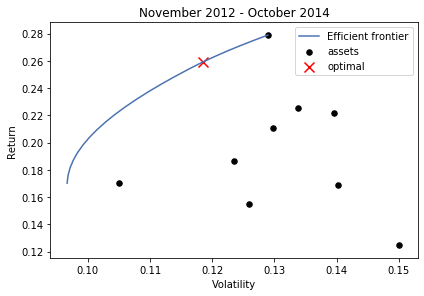

Expected annual return: 26.7%
Annual volatility: 11.1%
Sharpe Ratio: 2.22
502


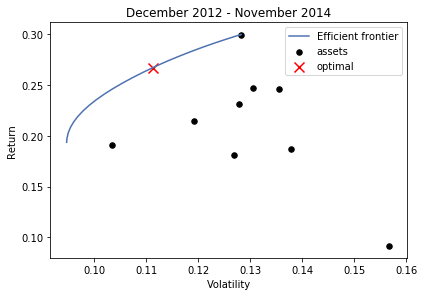

Expected annual return: 24.9%
Annual volatility: 11.2%
Sharpe Ratio: 2.05
504


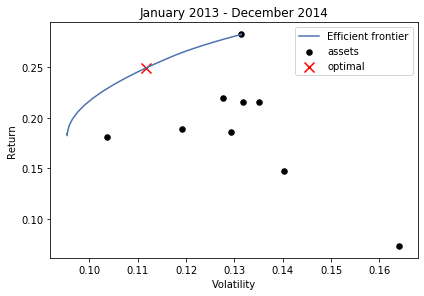

Expected annual return: 23.6%
Annual volatility: 11.7%
Sharpe Ratio: 1.85
503


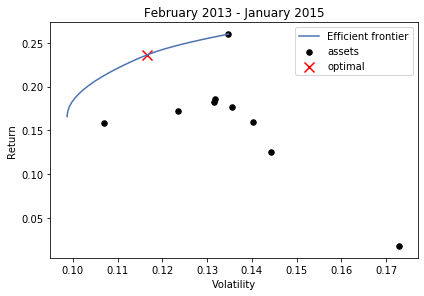

Expected annual return: 24.9%
Annual volatility: 12.0%
Sharpe Ratio: 1.92
503


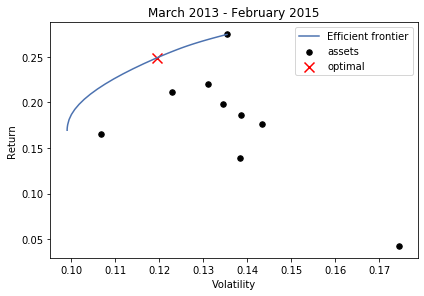

Expected annual return: 23.4%
Annual volatility: 12.8%
Sharpe Ratio: 1.68
505


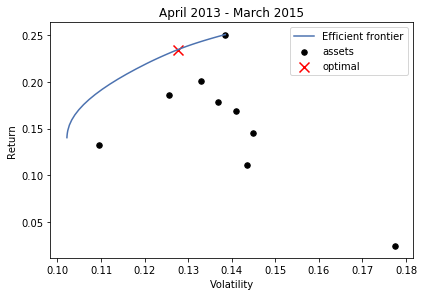

Expected annual return: 21.9%
Annual volatility: 12.2%
Sharpe Ratio: 1.62
504


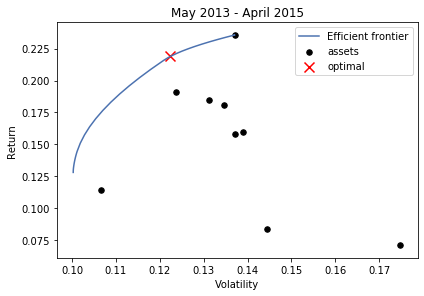

Expected annual return: 22.6%
Annual volatility: 12.5%
Sharpe Ratio: 1.64
502


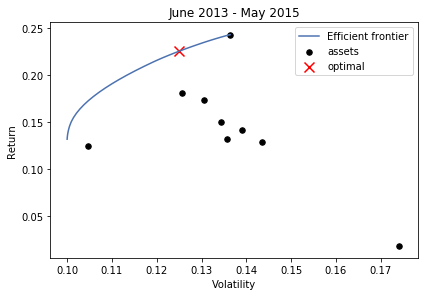

Expected annual return: 23.5%
Annual volatility: 12.9%
Sharpe Ratio: 1.67
504


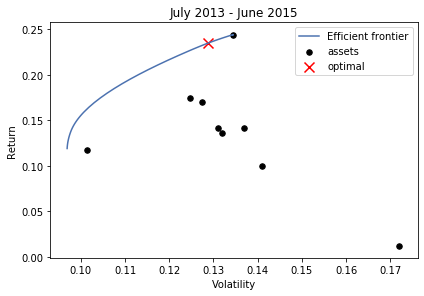

Expected annual return: 20.7%
Annual volatility: 12.5%
Sharpe Ratio: 1.49
504


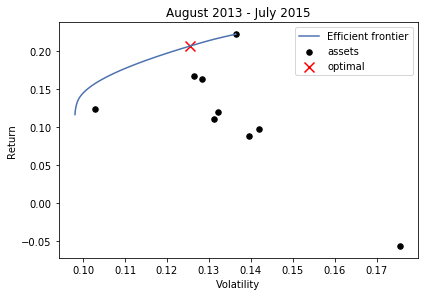

Expected annual return: 17.9%
Annual volatility: 12.9%
Sharpe Ratio: 1.24
503


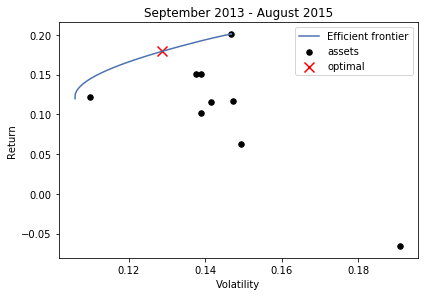

Expected annual return: 12.9%
Annual volatility: 11.7%
Sharpe Ratio: 0.93
504


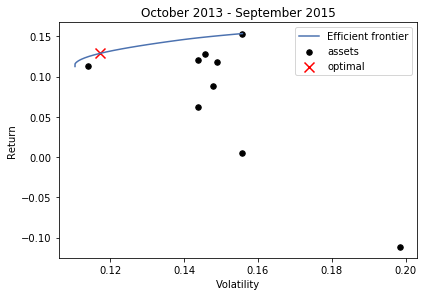

Expected annual return: 15.1%
Annual volatility: 12.8%
Sharpe Ratio: 1.03
503


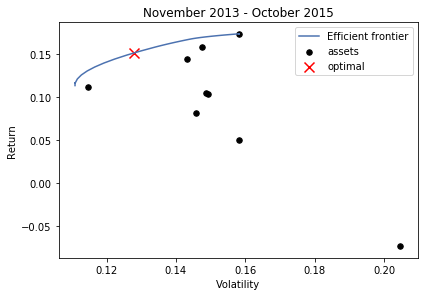

Expected annual return: 13.7%
Annual volatility: 12.6%
Sharpe Ratio: 0.93
503


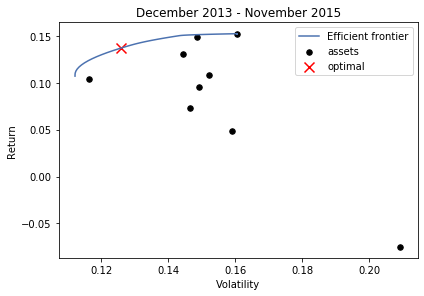

Expected annual return: 13.5%
Annual volatility: 12.2%
Sharpe Ratio: 0.94
504


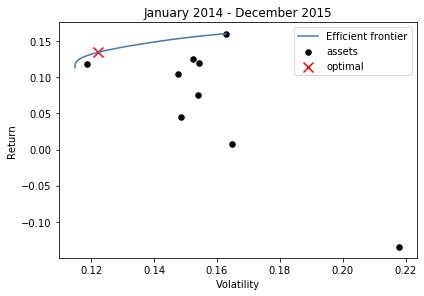

Expected annual return: 15.2%
Annual volatility: 12.0%
Sharpe Ratio: 1.10
502


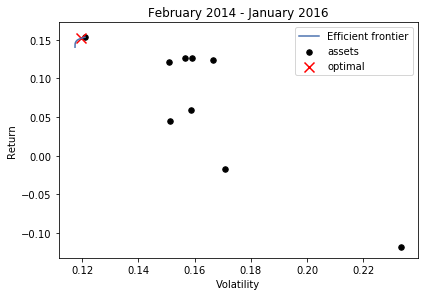

Expected annual return: 12.6%
Annual volatility: 11.9%
Sharpe Ratio: 0.89
503


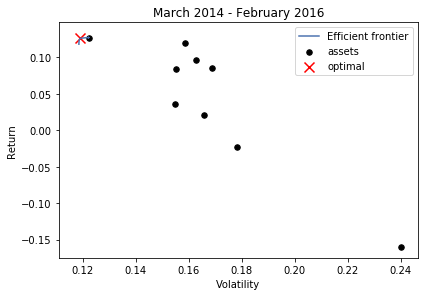

Expected annual return: 13.8%
Annual volatility: 11.9%
Sharpe Ratio: 0.99
504


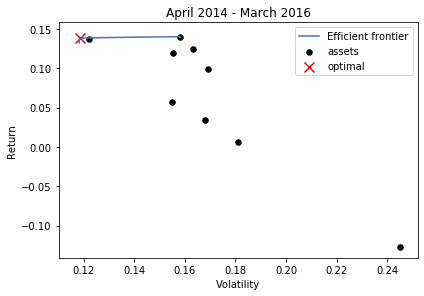

Expected annual return: 11.9%
Annual volatility: 12.2%
Sharpe Ratio: 0.82
504


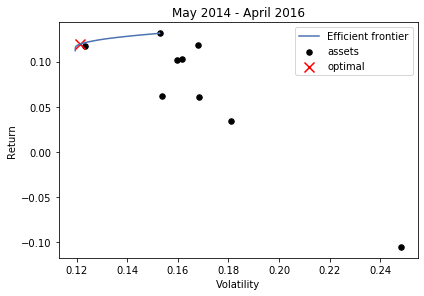

Expected annual return: 11.5%
Annual volatility: 12.1%
Sharpe Ratio: 0.78
504


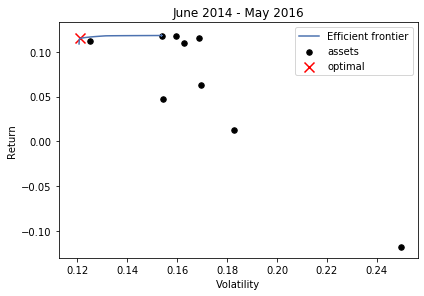

Expected annual return: 13.7%
Annual volatility: 12.3%
Sharpe Ratio: 0.95
505


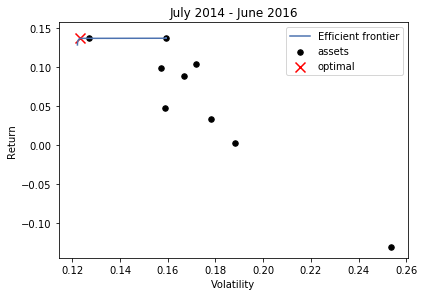

Expected annual return: 15.2%
Annual volatility: 12.3%
Sharpe Ratio: 1.07
503


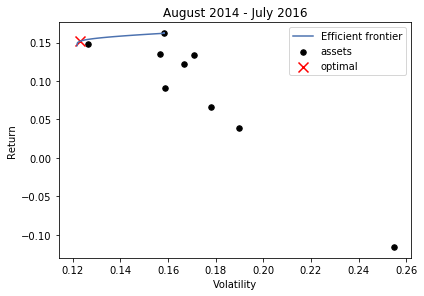

Expected annual return: 12.4%
Annual volatility: 12.3%
Sharpe Ratio: 0.85
505


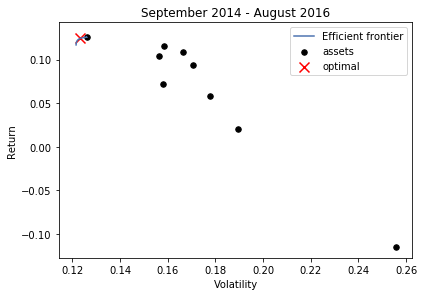

Expected annual return: 13.6%
Annual volatility: 13.2%
Sharpe Ratio: 0.88
505


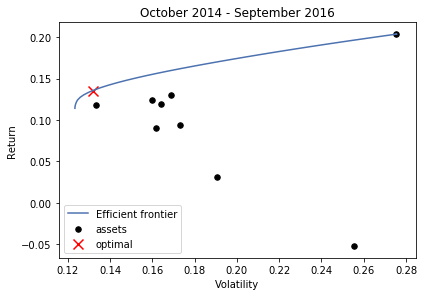

Expected annual return: 12.1%
Annual volatility: 14.0%
Sharpe Ratio: 0.73
503


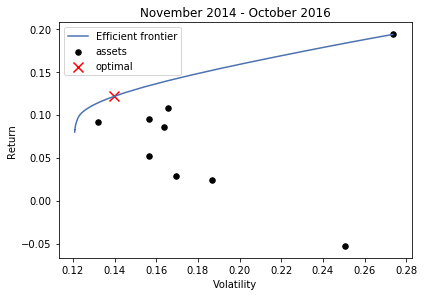

Expected annual return: 18.4%
Annual volatility: 19.6%
Sharpe Ratio: 0.84
505


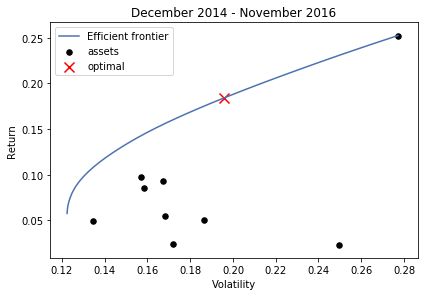

Expected annual return: 18.4%
Annual volatility: 18.7%
Sharpe Ratio: 0.88
504


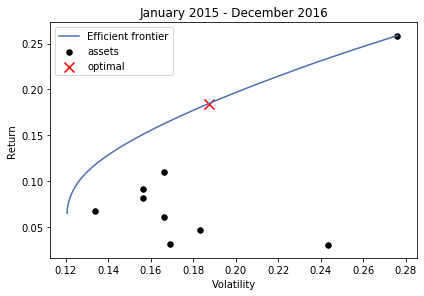

Expected annual return: 20.7%
Annual volatility: 18.1%
Sharpe Ratio: 1.03
504


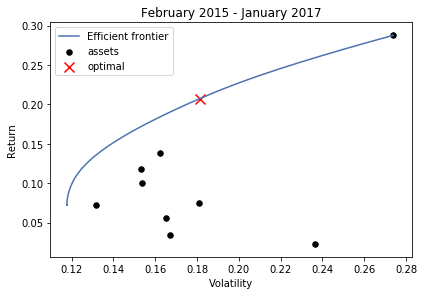

Expected annual return: 19.1%
Annual volatility: 15.6%
Sharpe Ratio: 1.10
504


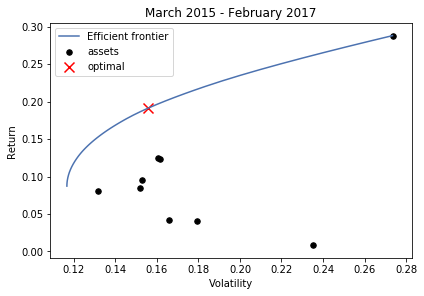

Expected annual return: 18.2%
Annual volatility: 14.3%
Sharpe Ratio: 1.13
505


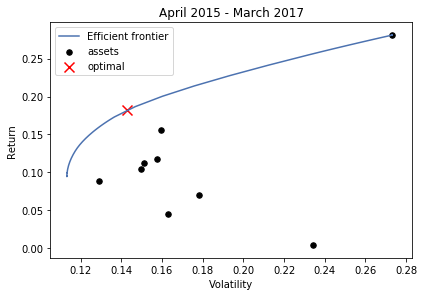

Expected annual return: 17.5%
Annual volatility: 14.1%
Sharpe Ratio: 1.10
503


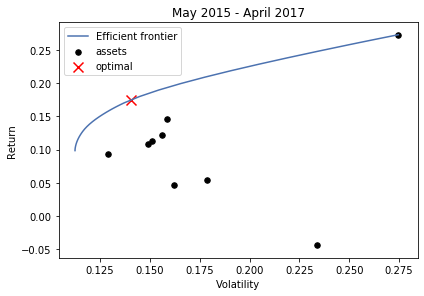

Expected annual return: 17.5%
Annual volatility: 13.2%
Sharpe Ratio: 1.17
505


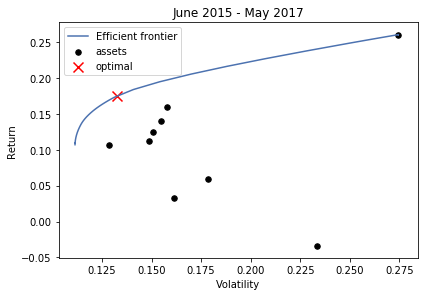

Expected annual return: 18.9%
Annual volatility: 13.1%
Sharpe Ratio: 1.29
505


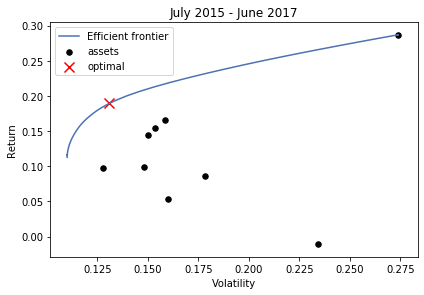

Expected annual return: 18.7%
Annual volatility: 13.0%
Sharpe Ratio: 1.29
503


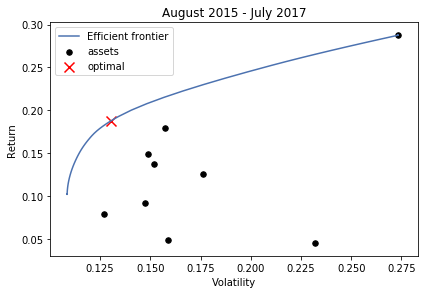

Expected annual return: 22.7%
Annual volatility: 11.4%
Sharpe Ratio: 1.82
505


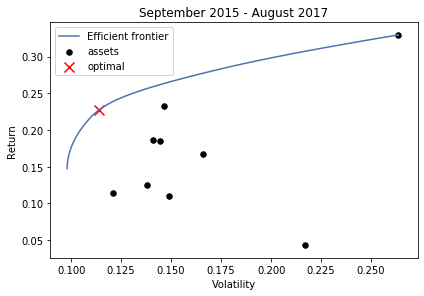

Expected annual return: 22.1%
Annual volatility: 10.9%
Sharpe Ratio: 1.84
504


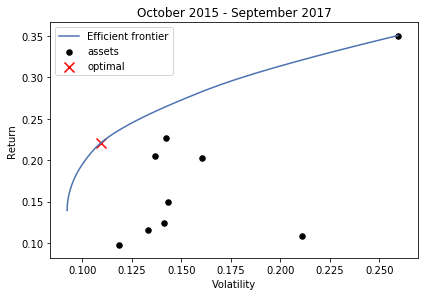

Expected annual return: 20.8%
Annual volatility: 10.9%
Sharpe Ratio: 1.73
504


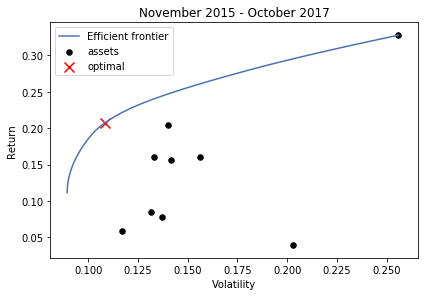

Expected annual return: 21.4%
Annual volatility: 10.4%
Sharpe Ratio: 1.86
505


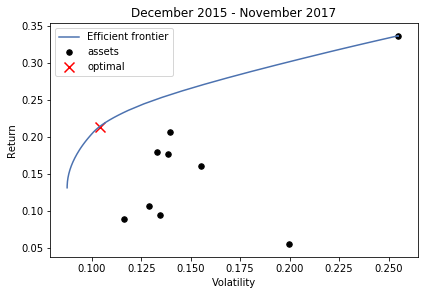

Expected annual return: 22.7%
Annual volatility: 10.1%
Sharpe Ratio: 2.06
503


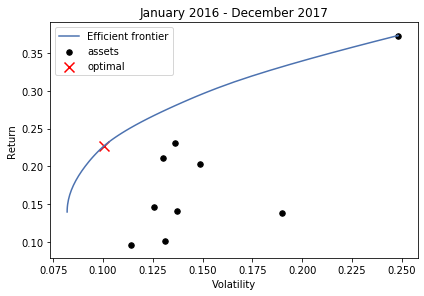

Expected annual return: 26.9%
Annual volatility: 9.4%
Sharpe Ratio: 2.64
505


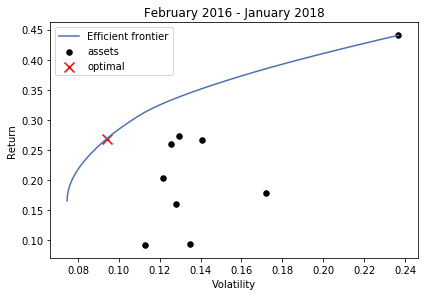

Expected annual return: 26.8%
Annual volatility: 11.0%
Sharpe Ratio: 2.26
504


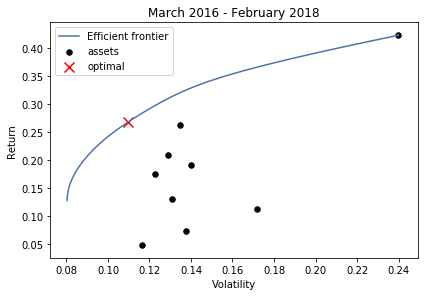

Expected annual return: 24.5%
Annual volatility: 12.6%
Sharpe Ratio: 1.78
503


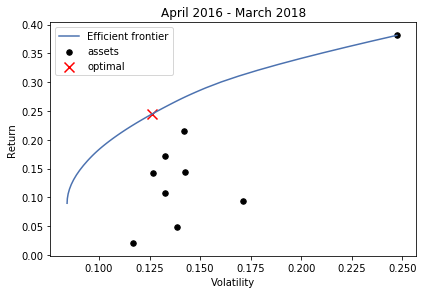

Expected annual return: 25.2%
Annual volatility: 12.8%
Sharpe Ratio: 1.80
503


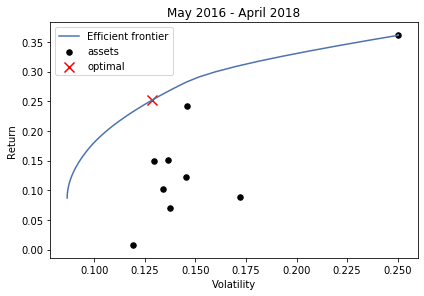

Expected annual return: 25.3%
Annual volatility: 12.7%
Sharpe Ratio: 1.84
504


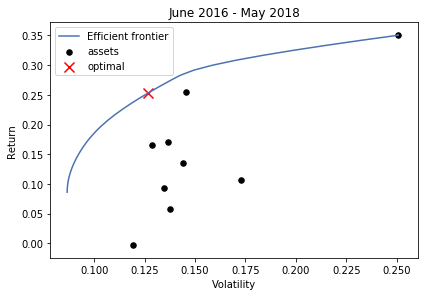

Expected annual return: 26.6%
Annual volatility: 12.4%
Sharpe Ratio: 1.98
503


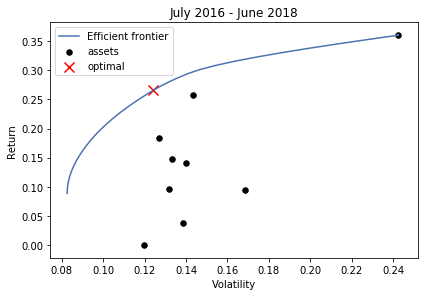

Expected annual return: 24.0%
Annual volatility: 11.7%
Sharpe Ratio: 1.87
504


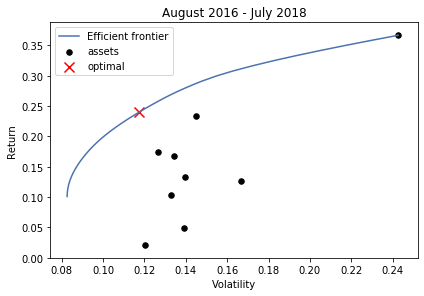

Expected annual return: 23.9%
Annual volatility: 10.9%
Sharpe Ratio: 2.02
504


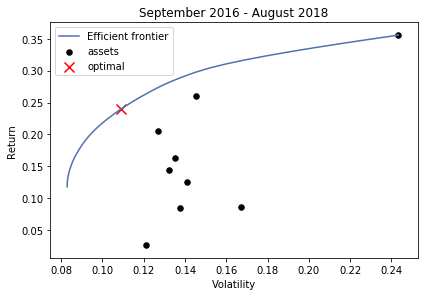

Expected annual return: 20.0%
Annual volatility: 9.9%
Sharpe Ratio: 1.81
502


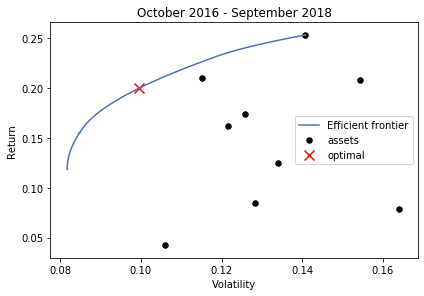

Expected annual return: 15.9%
Annual volatility: 9.7%
Sharpe Ratio: 1.43
504


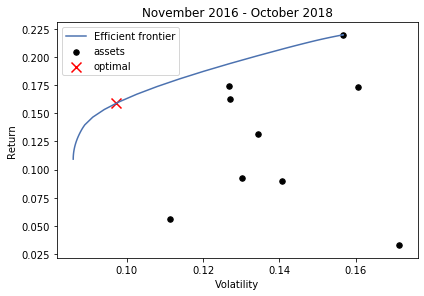

Expected annual return: 16.9%
Annual volatility: 9.7%
Sharpe Ratio: 1.54
504


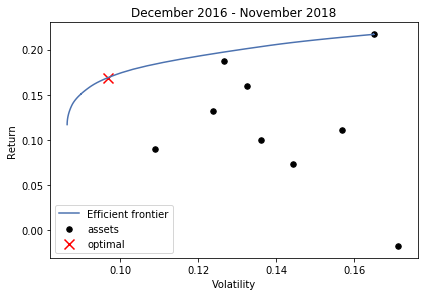

Expected annual return: 11.5%
Annual volatility: 10.6%
Sharpe Ratio: 0.90
502


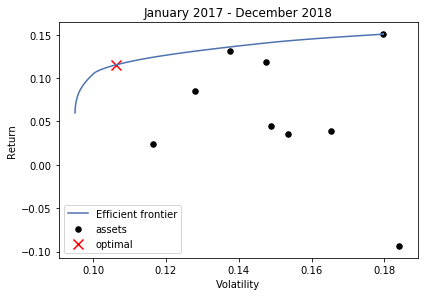

Expected annual return: 13.0%
Annual volatility: 10.6%
Sharpe Ratio: 1.04
503


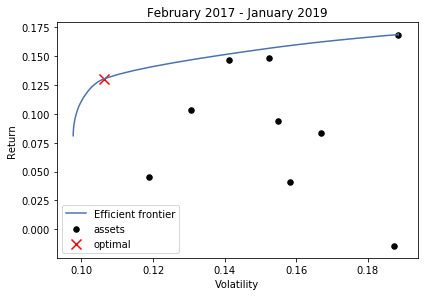

Expected annual return: 12.8%
Annual volatility: 11.3%
Sharpe Ratio: 0.95
503


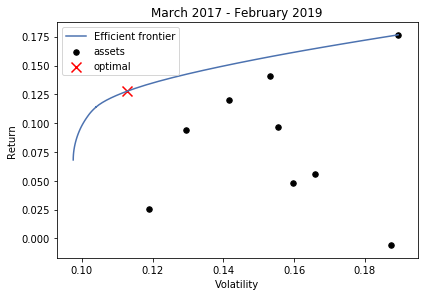

Expected annual return: 14.2%
Annual volatility: 11.4%
Sharpe Ratio: 1.07
501


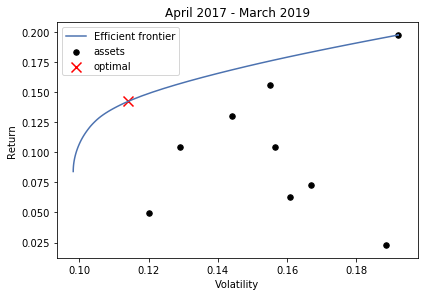

Expected annual return: 15.3%
Annual volatility: 11.5%
Sharpe Ratio: 1.15
503


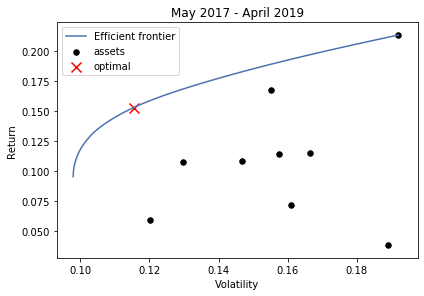

Expected annual return: 10.9%
Annual volatility: 11.7%
Sharpe Ratio: 0.76
503


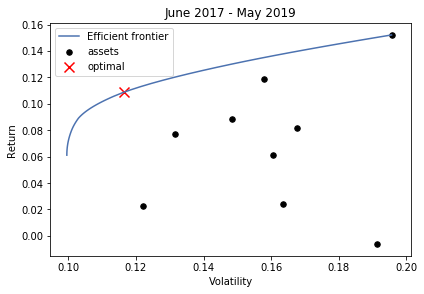

Expected annual return: 15.5%
Annual volatility: 11.7%
Sharpe Ratio: 1.16
501


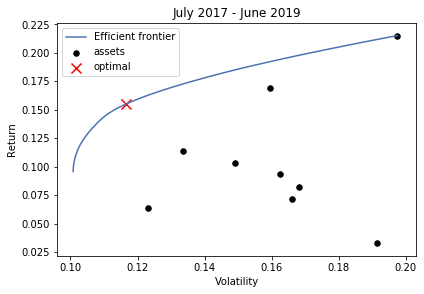

Expected annual return: 14.4%
Annual volatility: 11.9%
Sharpe Ratio: 1.05
503


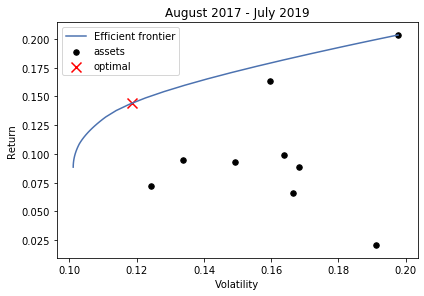

Expected annual return: 14.1%
Annual volatility: 11.6%
Sharpe Ratio: 1.04
502


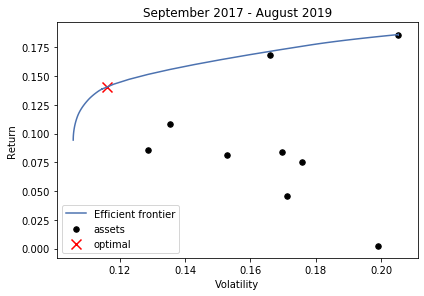

Expected annual return: 15.4%
Annual volatility: 11.3%
Sharpe Ratio: 1.19
502


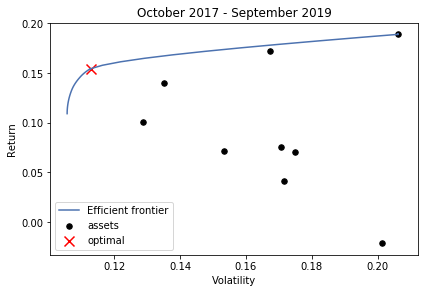

Expected annual return: 14.1%
Annual volatility: 11.5%
Sharpe Ratio: 1.05
503


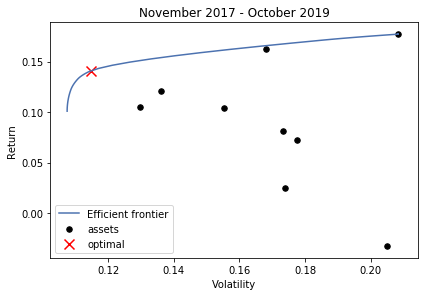

Expected annual return: 14.5%
Annual volatility: 13.0%
Sharpe Ratio: 0.96
502


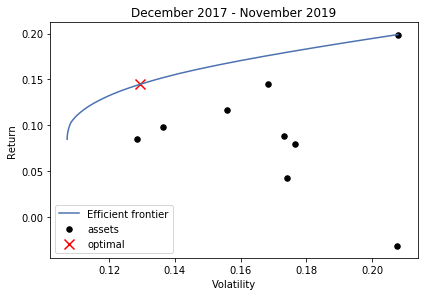

Expected annual return: 17.0%
Annual volatility: 12.3%
Sharpe Ratio: 1.22
503


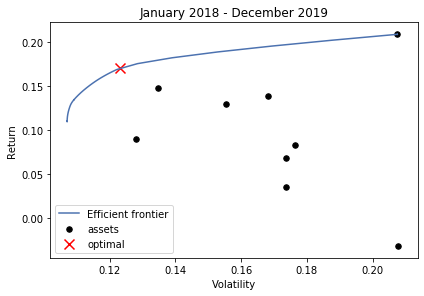

Expected annual return: 19.9%
Annual volatility: 12.0%
Sharpe Ratio: 1.49
503


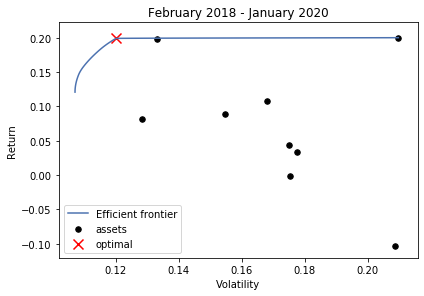

Expected annual return: 16.4%
Annual volatility: 12.2%
Sharpe Ratio: 1.18
503


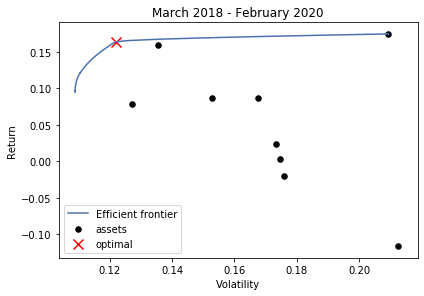

Expected annual return: 15.5%
Annual volatility: 25.5%
Sharpe Ratio: 0.53
504


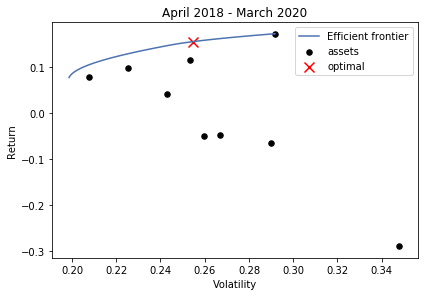

Expected annual return: 19.4%
Annual volatility: 26.4%
Sharpe Ratio: 0.66
504


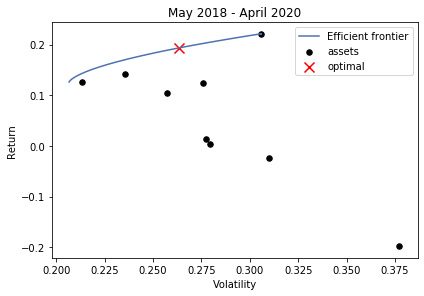

Expected annual return: 18.7%
Annual volatility: 25.0%
Sharpe Ratio: 0.67
502


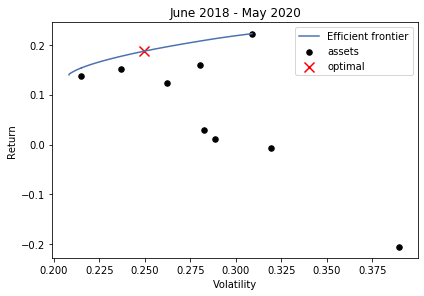

Expected annual return: 26.2%
Annual volatility: 31.3%
Sharpe Ratio: 0.77
503


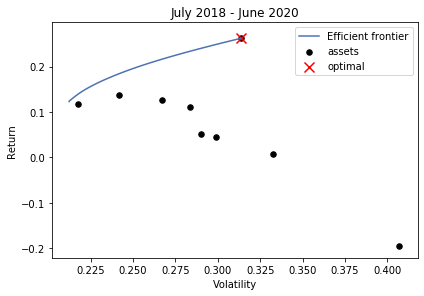

In [12]:
mons=['January','February','March','April','May','June','July','August','September','October','November','December']
first=first2
c=0
for i in range(2001,2021):
    for j in range(1,13):
        if i==2020 and j==7:
            break
        else:
            # Finding out year that needs to be removed
            remy=first.index.tolist()[0].year
            # Finding out month that needs to be removed
            remm=first.index.tolist()[0].month
            # Removing the oldest 1 month
            first=first[~((first.index.month==remm) & (first.index.year==remy))]
            # Adding extra month
            first=first.append(closing[(closing.index.year==i) & (closing.index.month==(j))])
            first
            avgRet=mean_historical_return(first,frequency=250)
            covMat=CovarianceShrinkage(first).ledoit_wolf()
            ef=CLA(avgRet,covMat)
            wts=ef.max_sharpe()
            cleaned_wts=ef.clean_weights()
            arr=np.array(ef.portfolio_performance(verbose=True))
            print(len(first))
            optPortOverTime=optPortOverTime.append({'Beg':(mons[(first.index.tolist()[0].month - 1)]+" "+str(first.index.tolist()[0].year)), 'End':mons[j-1]+" "+str(i),'Count':len(first),'XLB':cleaned_wts['XLB'], 'XLE':cleaned_wts['XLE'], 'XLF':cleaned_wts['XLF'], 'XLI':cleaned_wts['XLI'], 'XLK':cleaned_wts['XLK'], 'XLP':cleaned_wts['XLP'], 'XLU':cleaned_wts['XLU'], 'XLV':cleaned_wts['XLV'], 'XLY':cleaned_wts['XLY'],'Return':arr[0],'Volatility':arr[1]},ignore_index=True)
            s=mons[(first.index.tolist()[0].month - 1)]+" "+str(first.index.tolist()[0].year)+ ' - '+mons[j-1]+" "+str(i)
            ax=plotting.plot_efficient_frontier(ef,showfig=False)
            ax.set_title(s)
            plt.show()
            c+=1
            ax.figure.savefig("C://Users//Pratiksha Sharma//Documents//U'Mass Project - Dr. Pohlman//DataFromJupyter//efnew.png",bbox_inches = 'tight')
            document.add_picture("C://Users//Pratiksha Sharma//Documents//U'Mass Project - Dr. Pohlman//DataFromJupyter//efnew.png",width=Inches(6),height=Inches(5))    
            tab=document.add_closing(rows=2,cols=10)
            k=0
            for key,value in cleaned_wts.items():
                tab.rows[0].cells[k].text=key
                tab.rows[1].cells[k].text=str(value)
                k+=1
            document.add_paragraph("Expected Annual Return: "+str(np.round((arr[0]*100),2))+"%")
            document.add_paragraph("Annual Volatility: "+str(np.round((arr[1]*100),2))+"%")
            document.add_paragraph("Sharpe Ratio: "+str(np.round(arr[2],2)))
            document.save("C://Users//Pratiksha Sharma//Documents//U'Mass Project - Dr. Pohlman//DataFromJupyter//efnew.docx")

In [11]:
optPortOverTime.to_csv("C://Users//Pratiksha Sharma//Documents//U'Mass Project - Dr. Pohlman//DataFromJupyter//PortWtsOverTime.csv")